<a href="https://colab.research.google.com/github/Lreinoso15/serie_ACARA_patentamientos_2014-2022/blob/main/AST_TP2_ACARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

archivo = '/content/drive/MyDrive/AST/Serie_patentamientos.csv'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [3]:
df = pd.read_csv(archivo)

/tmp/ipython-input-3109908165.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


In [4]:
# === 2. Primeras filas ===
print("=== Primeras 5 filas ===")
print(df.head(), "\n")

# === 3. Información general ===
print("=== Información de columnas ===")
print(df.info(), "\n")

# === 4. Valores nulos ===
print("=== Valores nulos por columna ===")
print(df.isnull().sum(), "\n")

# === 5. Duplicados ===
print("=== Filas duplicadas ===")
print(df.duplicated().sum(), "\n")

# === 6. Estadísticas descriptivas ===
print("=== Estadísticas descriptivas ===")
print(df.describe(include='all').transpose(), "\n")

=== Primeras 5 filas ===
  IDENTIFICACIÓN BASICA COUNTRY       MARCA    BF GLOBAL   MODEL MODELO  \
0             195/60R14      RA  ALFA ROMEO  ALFA ROMEO ALFA 145    145   
1             195/60R14      RA  ALFA ROMEO  ALFA ROMEO ALFA 145    145   
2             195/60R14      RA  ALFA ROMEO  ALFA ROMEO ALFA 145    145   
3             195/60R14      RA  ALFA ROMEO  ALFA ROMEO ALFA 145    145   
4             195/60R14      RA  ALFA ROMEO  ALFA ROMEO ALFA 145    145   

   VERSIÓN  PUERTAS CARROCERÍA   TRACCIÓN RUEDAS   Y   NEUMÁTICOS  ... Feb_22  \
0  1.8 16V        3  hatchback  delantera                   serie  ...    0.0   
1  1.8 16V        3  hatchback  delantera                   serie  ...    0.0   
2  1.8 16V        3  hatchback  delantera                   serie  ...    0.0   
3  1.8 16V        3  hatchback  delantera                   serie  ...    0.0   
4  1.8 16V        3  hatchback  delantera                   serie  ...    0.0   

  Mar_22 Abr_22 May_22 Jun_22  Jul_22

In [5]:
df.head()

,IDENTIFICACIÓN BASICA,COUNTRY,MARCA,BF GLOBAL MODEL,MODELO,VERSIÓN,PUERTAS,CARROCERÍA,TRACCIÓN,RUEDAS Y NEUMÁTICOS,...,Feb_22,Mar_22,Abr_22,May_22,Jun_22,Jul_22,Ago_22,Sep_22,Oct_22,Nov_22
0,195/60R14,RA,ALFA ROMEO,ALFA ROMEO ALFA 145,145,1.8 16V,3,hatchback,delantera,serie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,195/60R14,RA,ALFA ROMEO,ALFA ROMEO ALFA 145,145,1.8 16V,3,hatchback,delantera,serie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,195/60R14,RA,ALFA ROMEO,ALFA ROMEO ALFA 145,145,1.8 16V,3,hatchback,delantera,serie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,195/60R14,RA,ALFA ROMEO,ALFA ROMEO ALFA 145,145,1.8 16V,3,hatchback,delantera,serie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,195/60R14,RA,ALFA ROMEO,ALFA ROMEO ALFA 145,145,1.8 16V,3,hatchback,delantera,serie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


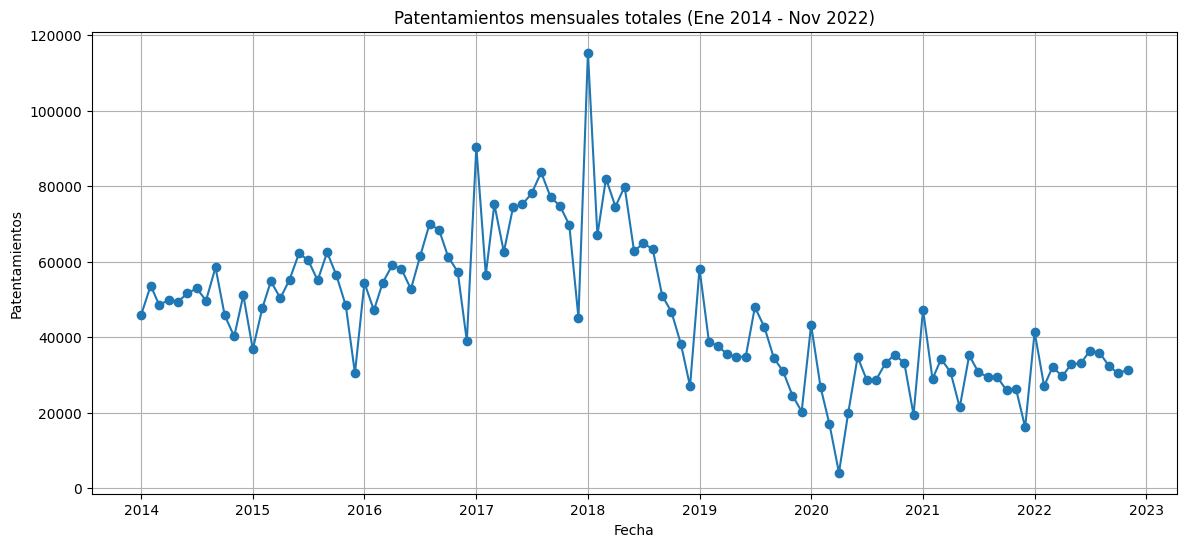

In [6]:
# --- 1) Detectar columnas de meses en español tipo "Ene_14" ---
pat = re.compile(r'^(Ene|Feb|Mar|Abr|May|Jun|Jul|Ago|Sep|Oct|Nov|Dic)_[0-9]{2}$')
mes_cols = [c for c in df.columns if pat.match(c)]

# Asegurar numérico
df[mes_cols] = df[mes_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# --- 2) Total mensual sumando todos los modelos ---
totales = df[mes_cols].sum(axis=0)  # Serie indexada por nombre de columna

# --- 3) Pasar a DataFrame largo y construir fecha ---
mes_map = {'Ene':1,'Feb':2,'Mar':3,'Abr':4,'May':5,'Jun':6,
           'Jul':7,'Ago':8,'Sep':9,'Oct':10,'Nov':11,'Dic':12}

tmp = totales.reset_index()
tmp.columns = ['mes_txt','patentamientos']

# dividir "Ene_14" en partes
tmp[['mes_str','yy']] = tmp['mes_txt'].str.split('_', expand=True)
tmp['month'] = tmp['mes_str'].map(mes_map).astype(int)
tmp['year']  = 2000 + tmp['yy'].astype(int)  # 14->2014, 22->2022
tmp['fecha'] = pd.to_datetime(dict(year=tmp['year'], month=tmp['month'], day=1))

totales_df = tmp[['fecha','patentamientos']].sort_values('fecha')

# --- 4) Gráfico línea mensual ---
plt.figure(figsize=(14,6))
plt.plot(totales_df['fecha'], totales_df['patentamientos'], marker='o')
plt.title('Patentamientos mensuales totales (Ene 2014 - Nov 2022)')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.grid(True)
plt.show()

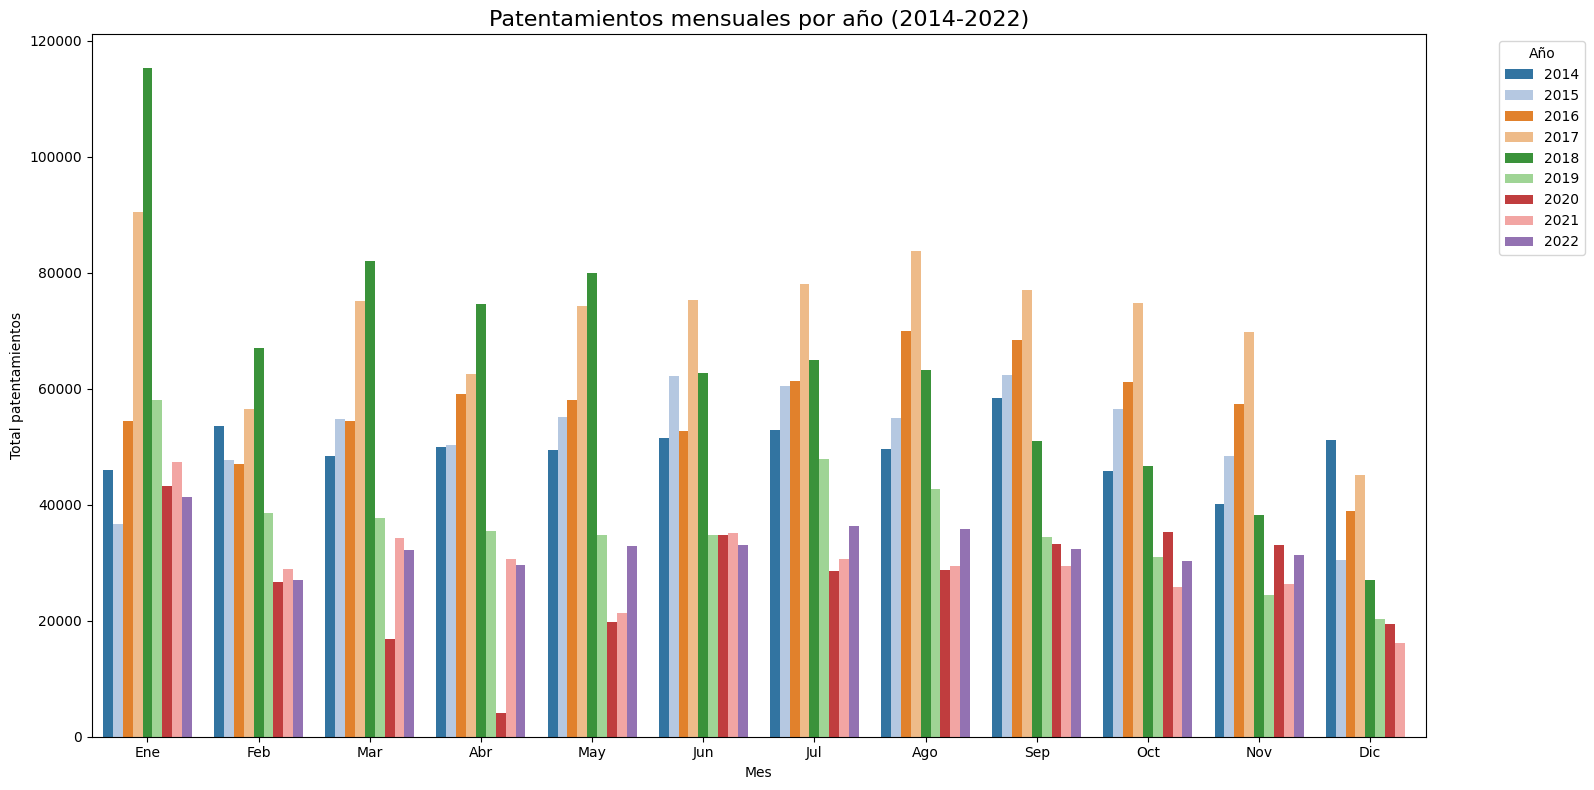

In [7]:
import seaborn as sns

# Extraer año y mes en columnas separadas
totales_df['año'] = totales_df['fecha'].dt.year
totales_df['mes'] = totales_df['fecha'].dt.month

# Ordenar por mes para el gráfico
mes_labels = ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
              "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

plt.figure(figsize=(16,8))
sns.barplot(
    data=totales_df,
    x='mes',
    y='patentamientos',
    hue='año',
    palette='tab20'
)

plt.title("Patentamientos mensuales por año (2014-2022)", fontsize=16)
plt.xlabel("Mes")
plt.ylabel("Total patentamientos")
plt.xticks(range(12), mes_labels)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


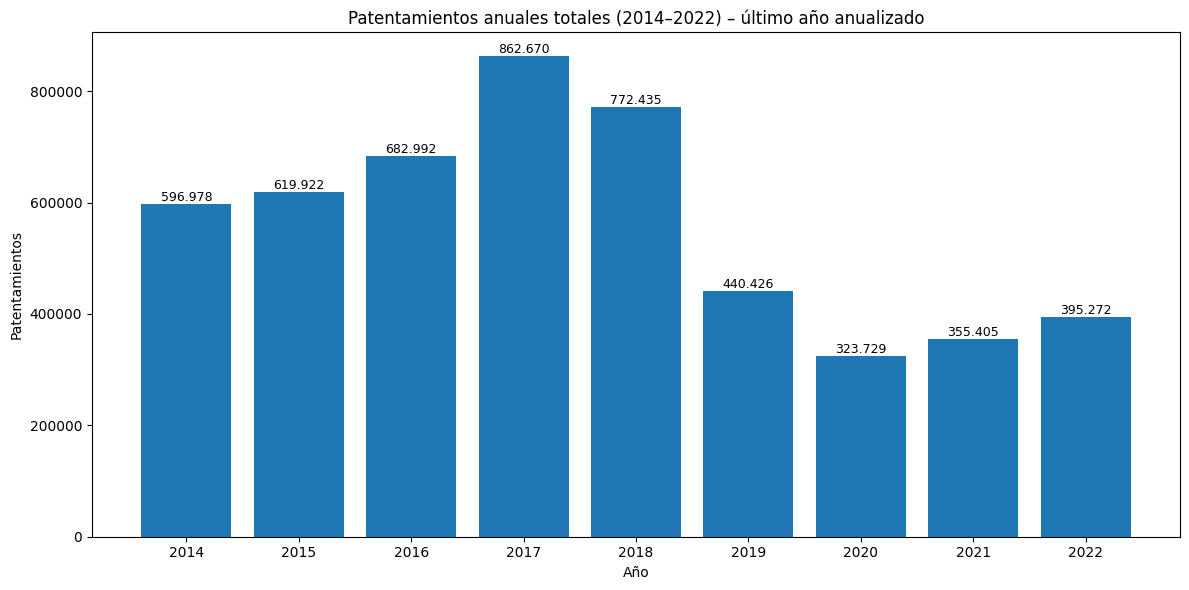

In [8]:
# 1) Totales por año (suma de los 12 meses; 2022 tiene 11 meses en tu dataset)
annual = (totales_df
          .groupby(totales_df['fecha'].dt.year)['patentamientos']
          .sum()
          .rename_axis('año')
          .reset_index(name='total'))

# 2) Agregar etiqueta YTD si el último año no tiene 12 meses
last_year = totales_df['fecha'].dt.year.max()
months_last_year = totales_df.loc[totales_df['fecha'].dt.year == last_year, 'fecha'].dt.month.nunique()
annual['label'] = annual['año'].astype(str)
if months_last_year < 12:
    annual.loc[annual['año'] == last_year, 'label'] = annual.loc[annual['año'] == last_year, 'label'] + ' (YTD)'

# 3) (Opcional) columna anualizada para comparar “manzana con manzana”
annualized = annual.copy()
if months_last_year < 12:
    factor = 12 / months_last_year
    annualized.loc[annualized['año'] == last_year, 'total'] *= factor


# --- Gráfico B (opcional): barras con el último año anualizado ---
plt.figure(figsize=(12,6))
plt.bar(annualized['año'].astype(str), annualized['total'])
plt.title('Patentamientos anuales totales (2014–2022) – último año anualizado')
plt.xlabel('Año')
plt.ylabel('Patentamientos')
for i, v in enumerate(annualized['total']):
    plt.text(i, v, f'{int(v):,}'.replace(',', '.'), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

      lb_stat  lb_pvalue
12  10.690918   0.555576


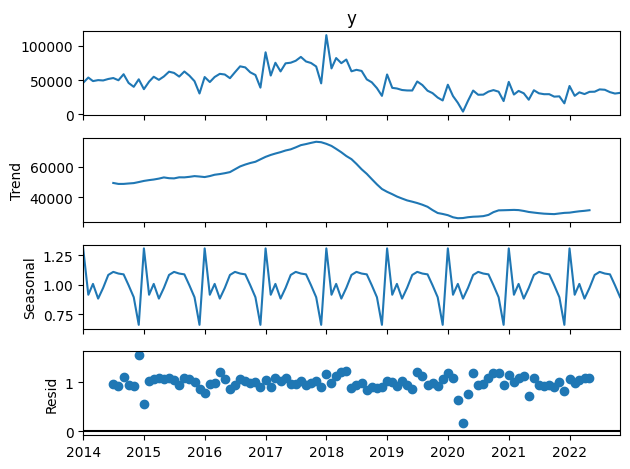

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd
import numpy as np

# --- 1) Armar df_monthly estándar desde totales_df ---
# totales_df debe tener: ['fecha', 'patentamientos']
df_monthly = (totales_df[['fecha', 'patentamientos']]
              .rename(columns={'fecha': 'ds', 'patentamientos': 'y'})
              .sort_values('ds')
              .copy())

# Asegurar índice mensual continuo (primer día de mes)
df_monthly = df_monthly.set_index('ds').asfreq('MS')

# Si hay huecos, rellenar de forma suave (opcional: usar método que prefieras)
if df_monthly['y'].isna().any():
    df_monthly['y'] = df_monthly['y'].interpolate(method='linear')

# --- 2) Elegir modelo según valores (multiplicativo requiere y > 0) ---
model_type = 'multiplicative'
if (df_monthly['y'] <= 0).any():
    model_type = 'additive'  # fallback automático

# --- 3) Descomposición ---
decomp = seasonal_decompose(df_monthly['y'], period=12, model=model_type)
fig = decomp.plot()

# --- 4) Ljung-Box sobre residuos ---
resid = decomp.resid.dropna()
ljung_box = acorr_ljungbox(resid, lags=[12], return_df=True)
print(ljung_box)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/n9_jszhl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/c_i8g664.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78463', 'data', 'file=/tmp/tmpmyso1b4b/n9_jszhl.json', 'init=/tmp/tmpmyso1b4b/c_i8g664.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelslfdf2ct/prophet_model-20250816124929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


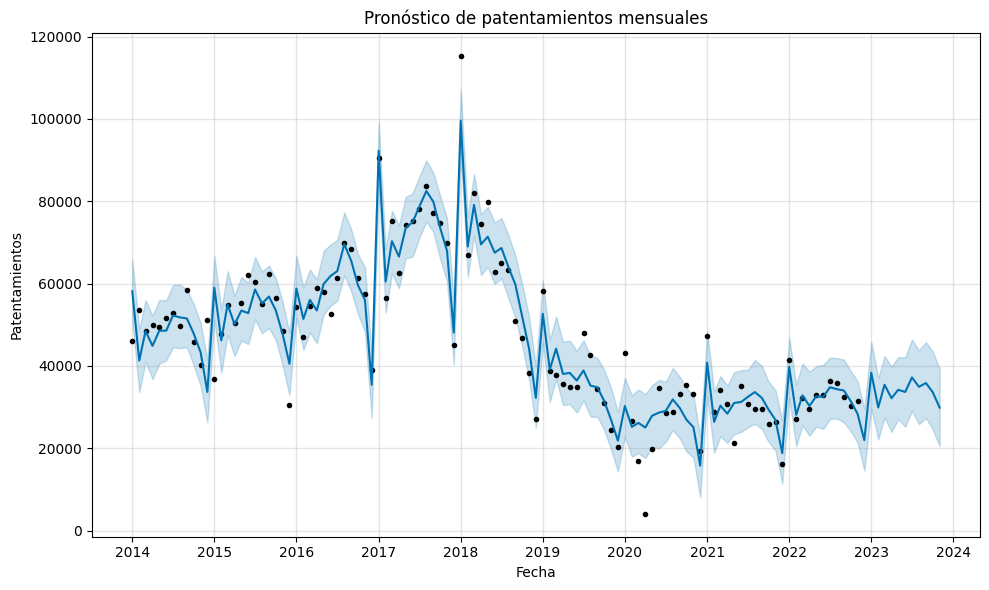

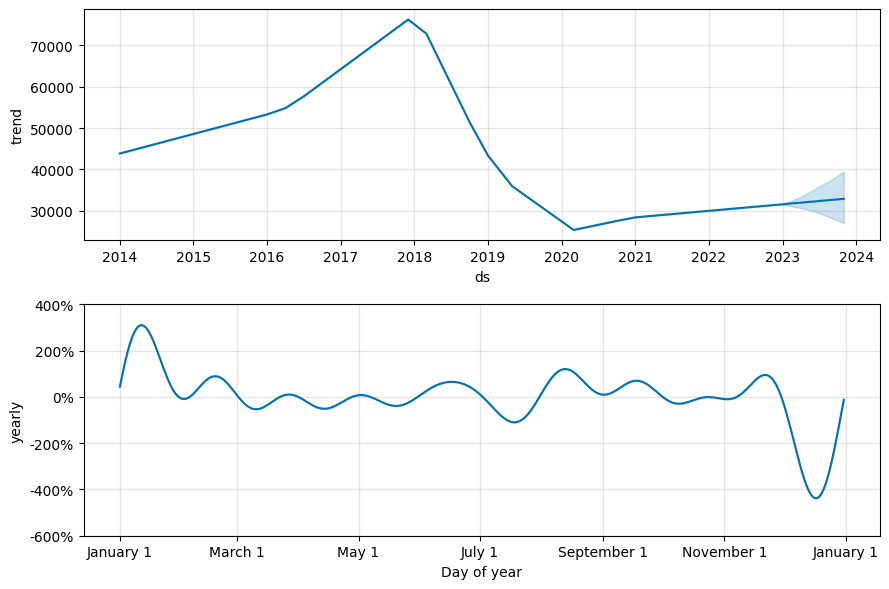

In [10]:

 !pip -q install prophet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 1) Preparar df_monthly para Prophet (ds, y)
df_monthly = (totales_df[['fecha','patentamientos']]
              .rename(columns={'fecha':'ds','patentamientos':'y'})
              .sort_values('ds')
              .copy())

# Asegurar frecuencia mensual explícita (inicio de mes) y rellenar huecos si existieran
df_monthly = df_monthly.set_index('ds').asfreq('MS')
if df_monthly['y'].isna().any():
    df_monthly['y'] = df_monthly['y'].interpolate(method='linear')
df_monthly = df_monthly.reset_index()

# 2) Elegir modo de estacionalidad
seasonality_mode = 'multiplicative' if (df_monthly['y'] > 0).all() else 'additive'

# 3) Crear y entrenar el modelo
m = Prophet(
    seasonality_mode=seasonality_mode,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.5  # un poco más flexible con cambios de nivel
)
m.fit(df_monthly.rename(columns={'ds':'ds','y':'y'}))

# 4) Forecast próximos 12 meses
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

# 5) Gráfico principal
fig1 = m.plot(forecast)
plt.title('Pronóstico de patentamientos mensuales')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.tight_layout()
plt.show()

# 6) Componentes (tendencia y estacionalidad)
fig2 = m.plot_components(forecast)
plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/elm2j4ef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/3qnq6hx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6676', 'data', 'file=/tmp/tmpmyso1b4b/elm2j4ef.json', 'init=/tmp/tmpmyso1b4b/3qnq6hx7.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelc0uwq39d/prophet_model-20250816124930.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1,725.11
MAE: 1,483.81
MAPE (y!=0): 5.35%
Meses en test: 12 | con y!=0: 12


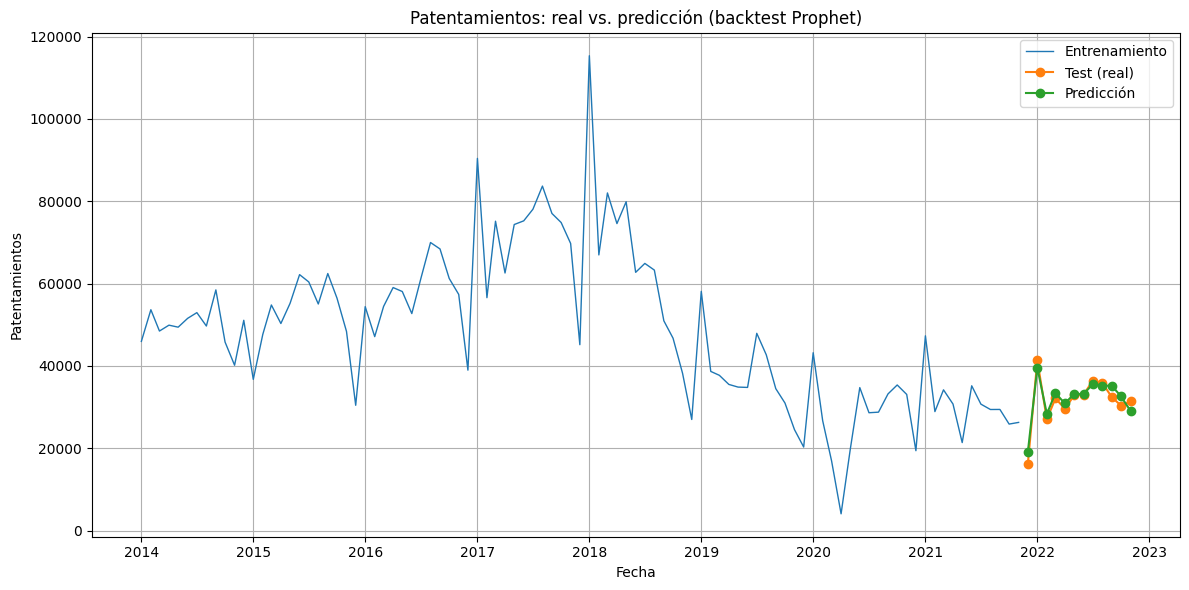

In [11]:
# --- Asegurar df_monthly (ds,y) desde totales_df, por si no existe ---
if 'df_monthly' not in globals():
    df_monthly = (totales_df[['fecha','patentamientos']]
                  .rename(columns={'fecha':'ds','patentamientos':'y'})
                  .sort_values('ds')
                  .copy())
    df_monthly = df_monthly.set_index('ds').asfreq('MS')
    df_monthly['y'] = df_monthly['y'].interpolate('linear')
    df_monthly = df_monthly.reset_index()

# === 1) Definir horizonte de test ===
horizon = 12  # meses
cutoff = df_monthly['ds'].max() - pd.DateOffset(months=horizon)
train = df_monthly[df_monthly['ds'] <= cutoff].copy()
test  = df_monthly[df_monthly['ds'] >  cutoff].copy()

# === 2) Entrenar Prophet con train ===
seasonality_mode = 'multiplicative' if (train['y'] > 0).all() else 'additive'
m = Prophet(
    seasonality_mode=seasonality_mode,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)
m.fit(train)

# === 3) Forecast hasta el final del test ===
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)

# === 4) Comparar con test ===
pred = forecast[['ds','yhat']].merge(test, on='ds', how='right')

# Métricas (MAPE robusto ante ceros)
rmse = np.sqrt(np.mean((pred['y'] - pred['yhat'])**2))
mae  = np.mean(np.abs(pred['y'] - pred['yhat']))
mask = pred['y'] != 0
mape = np.mean(np.abs((pred.loc[mask,'y'] - pred.loc[mask,'yhat']) / pred.loc[mask,'y'])) * 100

print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"MAPE (y!=0): {mape:,.2f}%")
print(f"Meses en test: {len(test)} | con y!=0: {mask.sum()}")

# === 5) Gráfico comparación ===
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento', linewidth=1)
plt.plot(test['ds'],  test['y'],  label='Test (real)', marker='o', linewidth=1.5)
plt.plot(pred['ds'],  pred['yhat'], label='Predicción', marker='o', linewidth=1.5)
plt.title('Patentamientos: real vs. predicción (backtest Prophet)')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import pandas as pd

# === 1) Baseline naive estacional: ŷ_t = y_{t-12} ===
test_naive = test.copy()
test_naive['ds_prev_year'] = test_naive['ds'] - pd.DateOffset(years=1)

# Traemos el valor del mismo mes del año anterior
prev = df_monthly[['ds','y']].rename(columns={'ds':'ds_prev_year', 'y':'y_naive'})
test_naive = test_naive.merge(prev, on='ds_prev_year', how='left')

# Nos quedamos con las columnas limpias
test_naive = test_naive[['ds','y','y_naive']].copy()

# === 2) Métricas para el naive ===
# evitamos division por 0 y filas sin y_naive
mask = (test_naive['y'] != 0) & test_naive['y_naive'].notna()

mape_naive = np.mean(np.abs((test_naive.loc[mask,'y'] - test_naive.loc[mask,'y_naive'])
                            / test_naive.loc[mask,'y'])) * 100
rmse_naive = np.sqrt(np.mean((test_naive.loc[mask,'y'] - test_naive.loc[mask,'y_naive'])**2))
mae_naive  = np.mean(np.abs(test_naive.loc[mask,'y'] - test_naive.loc[mask,'y_naive']))

# === 3) Comparación Prophet vs Naive ===
print(f"MAPE Prophet: {mape:,.2f}%")
print(f"MAPE Naive estacional: {mape_naive:,.2f}%")
print(f"Mejora relativa vs naive: {((mape_naive - mape) / mape_naive) * 100:,.1f}%")
print(f"RMSE Naive: {rmse_naive:,.2f} | MAE Naive: {mae_naive:,.2f}")


MAPE Prophet: 5.35%
MAPE Naive estacional: 13.93%
Mejora relativa vs naive: 61.6%
RMSE Naive: 5,167.08 | MAE Naive: 4,384.25


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/gfcdba0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/qgwp9w2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34888', 'data', 'file=/tmp/tmpmyso1b4b/gfcdba0k.json', 'init=/tmp/tmpmyso1b4b/qgwp9w2l.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelh1d6ckvs/prophet_model-20250816124932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1,974.75
MAE: 1,796.56
MAPE: 5.42%


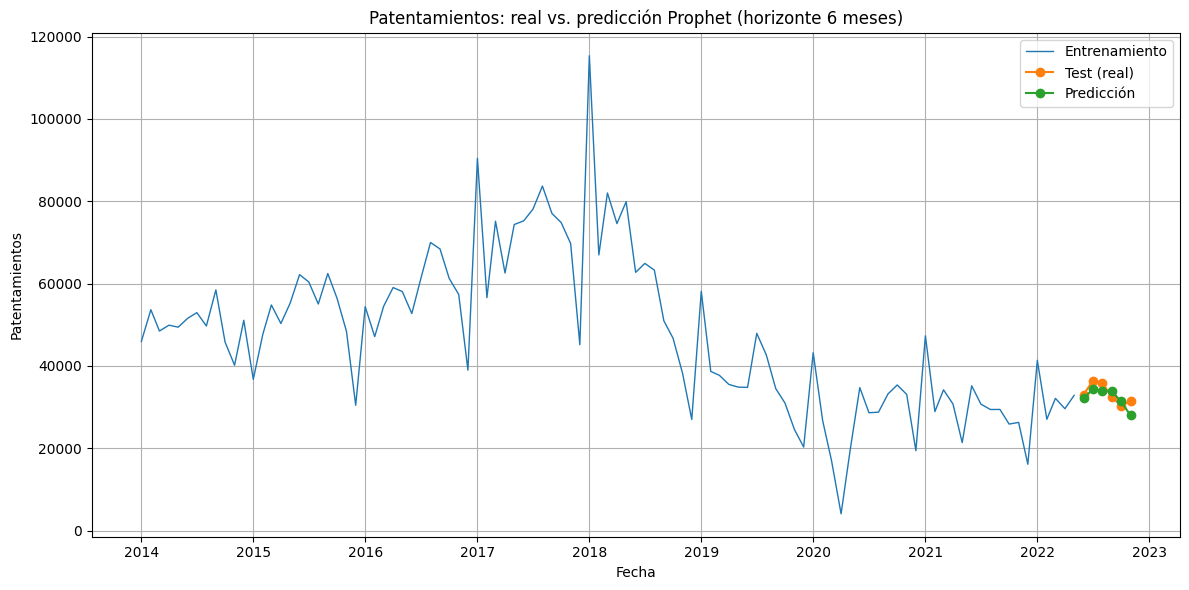

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# --- Asegurar df_monthly (ds, y) desde totales_df, si hiciera falta ---
if 'df_monthly' not in globals():
    df_monthly = (totales_df[['fecha','patentamientos']]
                  .rename(columns={'fecha':'ds','patentamientos':'y'})
                  .sort_values('ds')
                  .copy())
    df_monthly = df_monthly.set_index('ds').asfreq('MS')
    df_monthly['y'] = df_monthly['y'].interpolate('linear')
    df_monthly = df_monthly.reset_index()

# === 1) Horizonte de test: 6 meses ===
horizon = 6
cutoff = df_monthly['ds'].max() - pd.DateOffset(months=horizon)
train = df_monthly[df_monthly['ds'] <= cutoff].copy()
test  = df_monthly[df_monthly['ds'] >  cutoff].copy()

# === 2) Entrenar Prophet con train ===
seasonality_mode = 'multiplicative' if (train['y'] > 0).all() else 'additive'
m = Prophet(
    seasonality_mode=seasonality_mode,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)
m.fit(train)

# === 3) Forecast hasta el final del test ===
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)

# === 4) Comparar con test ===
pred = forecast[['ds','yhat']].merge(test, on='ds', how='right')

# Métricas (MAPE evitando división por 0)
rmse = np.sqrt(np.mean((pred['y'] - pred['yhat'])**2))
mae  = np.mean(np.abs(pred['y'] - pred['yhat']))
mask = pred['y'] != 0
mape = np.mean(np.abs((pred.loc[mask,'y'] - pred.loc[mask,'yhat']) / pred.loc[mask,'y'])) * 100

print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"MAPE: {mape:,.2f}%")

# === 5) Gráfico comparación ===
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento', linewidth=1)
plt.plot(test['ds'],  test['y'],  label='Test (real)', marker='o', linewidth=1.5)
plt.plot(pred['ds'],  pred['yhat'], label='Predicción', marker='o', linewidth=1.5)
plt.title('Patentamientos: real vs. predicción Prophet (horizonte 6 meses)')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/g9p7718p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/i0l42r9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64219', 'data', 'file=/tmp/tmpmyso1b4b/g9p7718p.json', 'init=/tmp/tmpmyso1b4b/i0l42r9p.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelm6qe39am/prophet_model-20250816170912.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:09:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:09:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1,725.11
MAE: 1,483.81
MAPE: 5.35%


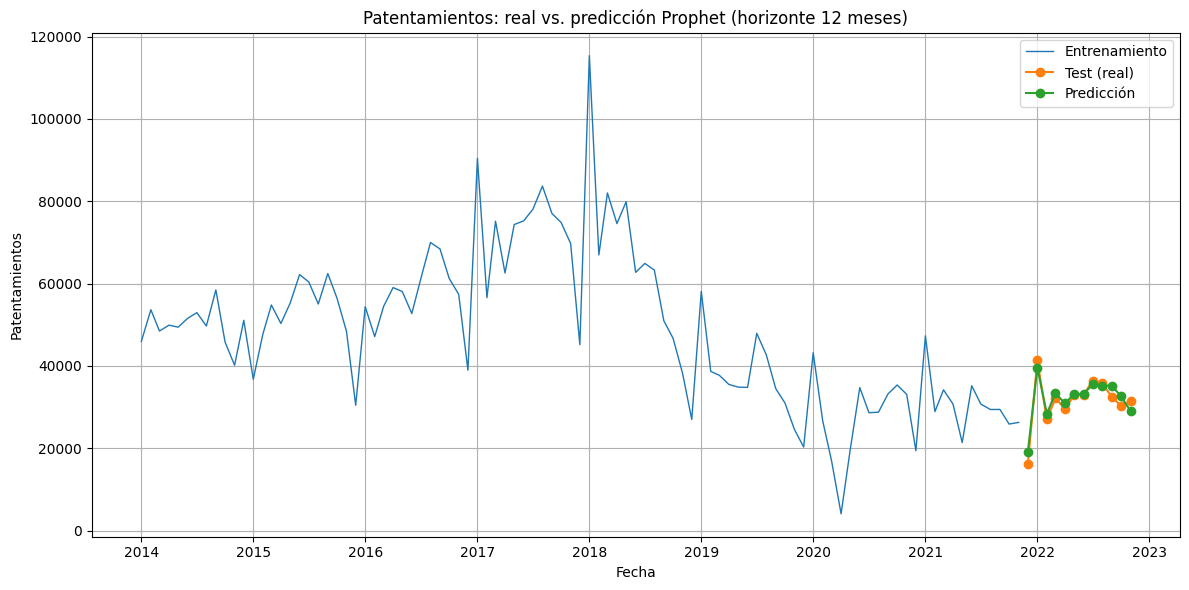

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# --- Asegurar df_monthly (ds, y) desde totales_df, si hiciera falta ---
if 'df_monthly' not in globals():
    df_monthly = (totales_df[['fecha','patentamientos']]
                  .rename(columns={'fecha':'ds','patentamientos':'y'})
                  .sort_values('ds')
                  .copy())
    df_monthly = df_monthly.set_index('ds').asfreq('MS')
    df_monthly['y'] = df_monthly['y'].interpolate('linear')
    df_monthly = df_monthly.reset_index()

# === 1) Horizonte de test: 12 meses ===
horizon = 12
cutoff = df_monthly['ds'].max() - pd.DateOffset(months=horizon)
train = df_monthly[df_monthly['ds'] <= cutoff].copy()
test  = df_monthly[df_monthly['ds'] >  cutoff].copy()

# === 2) Entrenar Prophet con train ===
seasonality_mode = 'multiplicative' if (train['y'] > 0).all() else 'additive'
m = Prophet(
    seasonality_mode=seasonality_mode,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)
m.fit(train)

# === 3) Forecast hasta el final del test ===
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)

# === 4) Comparar con test ===
pred = forecast[['ds','yhat']].merge(test, on='ds', how='right')

# Métricas (MAPE evitando división por 0)
rmse = np.sqrt(np.mean((pred['y'] - pred['yhat'])**2))
mae  = np.mean(np.abs(pred['y'] - pred['yhat']))
mask = pred['y'] != 0
mape = np.mean(np.abs((pred.loc[mask,'y'] - pred.loc[mask,'yhat']) / pred.loc[mask,'y'])) * 100

print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"MAPE: {mape:,.2f}%")

# === 5) Gráfico comparación ===
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento', linewidth=1)
plt.plot(test['ds'],  test['y'],  label='Test (real)', marker='o', linewidth=1.5)
plt.plot(pred['ds'],  pred['yhat'], label='Predicción', marker='o', linewidth=1.5)
plt.title('Patentamientos: real vs. predicción Prophet (horizonte 12 meses)')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/pv3njqve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/2usff5jh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96766', 'data', 'file=/tmp/tmpmyso1b4b/pv3njqve.json', 'init=/tmp/tmpmyso1b4b/2usff5jh.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelq45k52v1/prophet_model-20250816124932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/m6feeajg.json


[INFO] df_monthly listo: 2014-01-01 → 2022-11-01 | n=107
[SPLIT] Train: 2014-01-01 → 2022-08-01  |  Test: 2022-09-01 → 2022-11-01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/v794f81k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37356', 'data', 'file=/tmp/tmpmyso1b4b/m6feeajg.json', 'init=/tmp/tmpmyso1b4b/v794f81k.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_model1pbhtfry/prophet_model-20250816124933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/6dkn0uci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/556asomg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b


=== Prophet NORMAL (sin capado) ===
RMSE: 2,150.27 | MAE: 2,039.92 | MAPE: 6.49%

=== Prophet CAPADO (grid) – ordenado por MAPE ===
   q_low  q_high     p_low    p_high         RMSE          MAE      MAPE
0   0.01    0.99  16132.30  90196.22  2209.909611  1820.696765  5.790351
1   0.05    0.95  20447.30  77895.65  2270.586227  1921.242688  6.107788
2   0.02    0.98  17066.74  83572.04  2199.150806  1932.307528  6.145623

>>> Mejor capado: p1–p99  (clip [16,132.3, 90,196.2])  → RMSE=2,209.91 | MAE=1,820.70 | MAPE=5.79%

=== Naive estacional (y_{t-12}) ===
RMSE: 4,277.82 | MAE: 4,184.33 | MAPE: 13.40%

=== Mejoras relativas del mejor CAPADO ===
vs NORMAL – RMSE: -2.8% | MAE: 10.7% | MAPE: 10.8%
vs NAIVE  – RMSE: 48.3% | MAE: 56.5% | MAPE: 56.8%


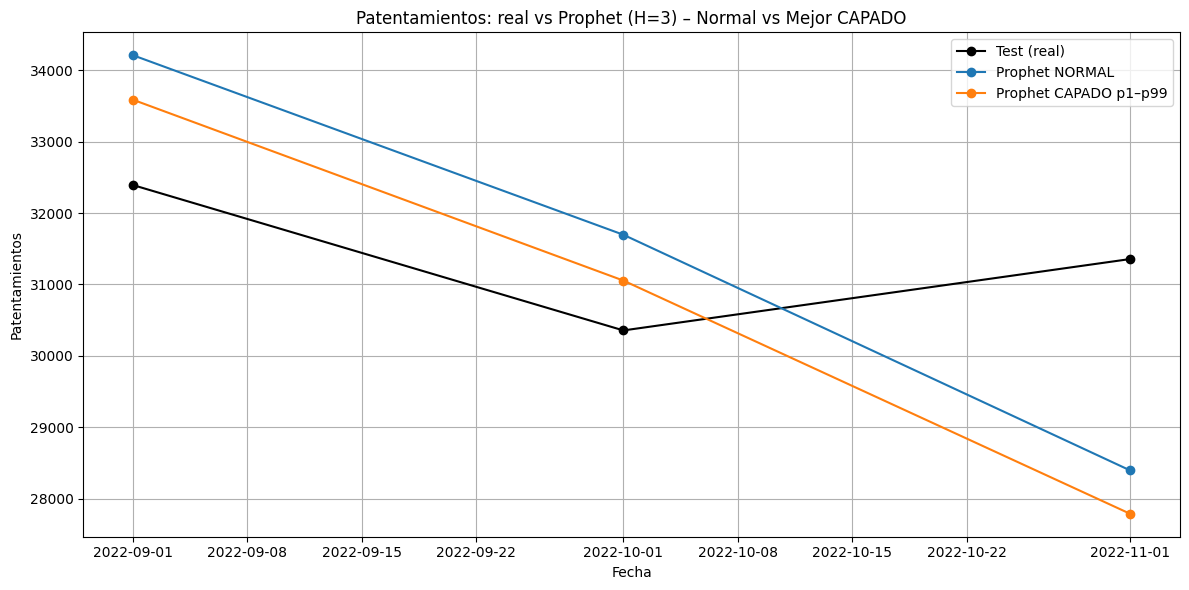

In [14]:
# --- Requisitos e imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instalar Prophet si hace falta (Colab)
try:
    from prophet import Prophet
except Exception:
    !pip -q install prophet
    from prophet import Prophet

# ===============================
# 0) Armar df_monthly desde totales_df
# ===============================
# Se asume que ya tenés 'totales_df' con columnas ['fecha','patentamientos'].
# Si no existe, detenemos con un mensaje claro.
assert 'totales_df' in globals(), "No encuentro 'totales_df'. Asegurate de crearlo antes."

df_monthly = (
    totales_df[['fecha','patentamientos']]
    .rename(columns={'fecha':'ds','patentamientos':'y'})
    .sort_values('ds')
    .copy()
)
# Asegurar mensual continuo y rellenar huecos si existieran
df_monthly = df_monthly.set_index('ds').asfreq('MS')
if df_monthly['y'].isna().any():
    df_monthly['y'] = df_monthly['y'].interpolate(method='linear')
df_monthly = df_monthly.reset_index()

print(f"[INFO] df_monthly listo: {df_monthly['ds'].min().date()} → {df_monthly['ds'].max().date()} | n={len(df_monthly)}")

# ===============================
# 1) Split: últimos 3 meses como test
# ===============================
H = 3
cutoff = df_monthly['ds'].max() - pd.DateOffset(months=H)
train_raw = df_monthly[df_monthly['ds'] <= cutoff].copy()
test      = df_monthly[df_monthly['ds'] >  cutoff].copy()

print(f"[SPLIT] Train: {train_raw['ds'].min().date()} → {train_raw['ds'].max().date()}  |  Test: {test['ds'].min().date()} → {test['ds'].max().date()}")

# ===============================
# 2) Helpers
# ===============================
def fit_predict_prophet(train_df, test_df, cps=0.3, sps=1.0):
    """Entrena Prophet en train_df y predice hasta cubrir test_df."""
    seasonality_mode = 'multiplicative' if (train_df['y'] > 0).all() else 'additive'
    m = Prophet(
        seasonality_mode=seasonality_mode,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=cps,
        seasonality_prior_scale=sps,
        changepoint_range=0.9
    )
    m.fit(train_df[['ds','y']])
    future = m.make_future_dataframe(periods=len(test_df), freq='MS')
    fc = m.predict(future)
    pred = fc[['ds','yhat']].merge(test_df[['ds','y']], on='ds', how='right')
    return pred, m

def metrics(pred):
    rmse = float(np.sqrt(np.mean((pred['y'] - pred['yhat'])**2)))
    mae  = float(np.mean(np.abs(pred['y'] - pred['yhat'])))
    mask = pred['y'] != 0
    mape = float(np.mean(np.abs((pred.loc[mask,'y'] - pred.loc[mask,'yhat']) / pred.loc[mask,'y'])) * 100)
    return rmse, mae, mape

def cap_train(df_train, q_low, q_high):
    """Winsoriza solo el train para evitar fuga de info."""
    p_low, p_high = df_train['y'].quantile([q_low, q_high])
    out = df_train.copy()
    out['y'] = out['y'].clip(lower=p_low, upper=p_high)
    return out, p_low, p_high

def rel_improve(old, new):
    return (old - new) / old * 100 if old else np.nan

# ===============================
# 3) Prophet NORMAL
# ===============================
pred_norm, model_norm = fit_predict_prophet(train_raw, test)
rmse_n, mae_n, mape_n = metrics(pred_norm)

# ===============================
# 4) Prophet CAPADO: grid de percentiles
# ===============================
q_grid = [(0.01,0.99), (0.02,0.98), (0.05,0.95)]
rows = []
preds_cap = {}

for ql, qh in q_grid:
    train_cap, pL, pH = cap_train(train_raw, ql, qh)
    pred_cap, _ = fit_predict_prophet(train_cap, test)
    rmse_c, mae_c, mape_c = metrics(pred_cap)
    preds_cap[(ql,qh)] = pred_cap
    rows.append({'q_low': ql, 'q_high': qh, 'p_low': pL, 'p_high': pH,
                 'RMSE': rmse_c, 'MAE': mae_c, 'MAPE': mape_c})

res_cap = pd.DataFrame(rows).sort_values('MAPE').reset_index(drop=True)
best = res_cap.iloc[0]
best_q = (best['q_low'], best['q_high'])
pred_best = preds_cap[best_q]

# ===============================
# 5) Baseline: Naive estacional y_{t-12}
# ===============================
dfm = df_monthly.copy().sort_values('ds')
test_naive = test.copy()
test_naive['ds_prev_year'] = test_naive['ds'] - pd.DateOffset(years=1)
prev = dfm[['ds','y']].rename(columns={'ds':'ds_prev_year', 'y':'y_naive'})
test_naive = test_naive.merge(prev, on='ds_prev_year', how='left')[['ds','y','y_naive']]
mask_nv = (test_naive['y'] != 0) & test_naive['y_naive'].notna()
rmse_nv = float(np.sqrt(np.mean((test_naive.loc[mask_nv,'y'] - test_naive.loc[mask_nv,'y_naive'])**2)))
mae_nv  = float(np.mean(np.abs(test_naive.loc[mask_nv,'y'] - test_naive.loc[mask_nv,'y_naive'])))
mape_nv = float(np.mean(np.abs((test_naive.loc[mask_nv,'y'] - test_naive.loc[mask_nv,'y_naive']) / test_naive.loc[mask_nv,'y'])) * 100)

# ===============================
# 6) Resultados
# ===============================
print("\n=== Prophet NORMAL (sin capado) ===")
print(f"RMSE: {rmse_n:,.2f} | MAE: {mae_n:,.2f} | MAPE: {mape_n:,.2f}%")

print("\n=== Prophet CAPADO (grid) – ordenado por MAPE ===")
print(res_cap[['q_low','q_high','p_low','p_high','RMSE','MAE','MAPE']])

print(f"\n>>> Mejor capado: p{int(best['q_low']*100)}–p{int(best['q_high']*100)}  "
      f"(clip [{best['p_low']:,.1f}, {best['p_high']:,.1f}])  "
      f"→ RMSE={best['RMSE']:,.2f} | MAE={best['MAE']:,.2f} | MAPE={best['MAPE']:,.2f}%")

print("\n=== Naive estacional (y_{t-12}) ===")
print(f"RMSE: {rmse_nv:,.2f} | MAE: {mae_nv:,.2f} | MAPE: {mape_nv:,.2f}%")

print("\n=== Mejoras relativas del mejor CAPADO ===")
print(f"vs NORMAL – RMSE: {rel_improve(rmse_n, best['RMSE']):.1f}% | "
      f"MAE: {rel_improve(mae_n, best['MAE']):.1f}% | MAPE: {rel_improve(mape_n, best['MAPE']):.1f}%")
print(f"vs NAIVE  – RMSE: {rel_improve(rmse_nv, best['RMSE']):.1f}% | "
      f"MAE: {rel_improve(mae_nv, best['MAE']):.1f}% | MAPE: {rel_improve(mape_nv, best['MAPE']):.1f}%")

# ===============================
# 7) Gráfico comparativo
# ===============================
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Test (real)', color='black', marker='o')
plt.plot(pred_norm['ds'], pred_norm['yhat'], label='Prophet NORMAL', marker='o')
plt.plot(pred_best['ds'], pred_best['yhat'],
         label=f'Prophet CAPADO p{int(best_q[0]*100)}–p{int(best_q[1]*100)}', marker='o')
plt.title('Patentamientos: real vs Prophet (H=3) – Normal vs Mejor CAPADO')
plt.xlabel('Fecha'); plt.ylabel('Patentamientos')
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/iigian6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/7onrgj5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42507', 'data', 'file=/tmp/tmpmyso1b4b/iigian6a.json', 'init=/tmp/tmpmyso1b4b/7onrgj5y.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelk1q58zc_/prophet_model-20250816124934.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[INFO] df_monthly: 2014-01-01 → 2022-11-01 | n=107
[INFO] Cutoffs utilizados: 8 (periodicidad=3m, últimos 8)


12:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/oyil3rth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/ncxwp1lz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89479', 'data', 'file=/tmp/tmpmyso1b4b/oyil3rth.json', 'init=/tmp/tmpmyso1b4b/ncxwp1lz.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelk7ciwc8k/prophet_model-20250816124935.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/6idq52a6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/o0yt8ka4.json
DEBUG:cmdstanpy:id


==== RESUMEN LITE ====
   horizon_m                  model         RMSE          MAE       MAPE
0          3         Prophet Normal  5066.516299  4683.420612  16.010736
1          3  Prophet Capado p1–p99  5308.127459  4792.384841  16.051312


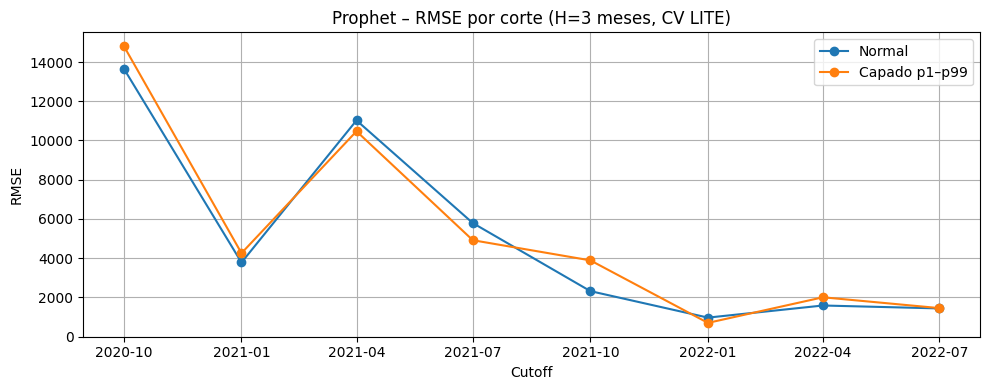

In [15]:
# ==== Prophet CV LITE (rápido) para un horizonte H — versión robusta ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from prophet import Prophet
except Exception:
    !pip -q install prophet
    from prophet import Prophet

# ---------- 0) df_monthly desde totales_df ----------
assert 'totales_df' in globals(), "Falta 'totales_df' con ['fecha','patentamientos']"
df_monthly = (
    totales_df[['fecha','patentamientos']]
    .rename(columns={'fecha':'ds','patentamientos':'y'})
    .sort_values('ds')
    .copy()
)
df_monthly['ds'] = pd.to_datetime(df_monthly['ds'])
df_monthly['y']  = pd.to_numeric(df_monthly['y'], errors='coerce')
df_monthly = df_monthly.set_index('ds').asfreq('MS')
if df_monthly['y'].isna().any():
    df_monthly['y'] = df_monthly['y'].interpolate('linear')
df_monthly = df_monthly.reset_index()

# Blindaje por si el reset_index deja 'index' en vez de 'ds'
if 'ds' not in df_monthly.columns:
    df_monthly = df_monthly.rename(columns={'index':'ds'})
df_monthly = df_monthly[['ds','y']].copy()
df_monthly['ds'] = pd.to_datetime(df_monthly['ds'])
df_monthly['y']  = pd.to_numeric(df_monthly['y'], errors='coerce')

print(f"[INFO] df_monthly: {df_monthly['ds'].min().date()} → {df_monthly['ds'].max().date()} | n={len(df_monthly)}")

# ---------- Parámetros LITE ----------
H = 3                  # <- corré 3, luego cambiá a 6 y 12 en corridas separadas
INITIAL_YEARS = 3
PERIOD_MONTHS = 3
MAX_CUTOFFS = 8
USE_CAP = True         # capado p1–p99

# ---------- Helpers ----------
def _fit_predict_prophet(train_df, horizon_m, cps=0.3, sps=1.0):
    t = train_df[['ds','y']].copy()
    if 'ds' not in t.columns: t = t.rename(columns={'index':'ds'})
    t['ds'] = pd.to_datetime(t['ds'])
    t['y']  = pd.to_numeric(t['y'], errors='coerce').fillna(0)

    seasonality_mode = 'multiplicative' if (t['y'] > 0).all() else 'additive'
    m = Prophet(
        seasonality_mode=seasonality_mode,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=cps,
        seasonality_prior_scale=sps,
        changepoint_range=0.9
    )
    m.fit(t[['ds','y']])
    future = m.make_future_dataframe(periods=horizon_m, freq='MS')
    fc = m.predict(future)
    pred = fc[['ds','yhat']].tail(horizon_m).reset_index(drop=True)
    return pred

def _metrics(y_true, y_hat):
    y_true = pd.Series(y_true).astype(float).values
    y_hat  = pd.Series(y_hat).astype(float).values
    err = y_true - y_hat
    rmse = float(np.sqrt(np.mean(err**2)))
    mae  = float(np.mean(np.abs(err)))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask] - y_hat[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def _winsorize_train(train_df, q_low=0.01, q_high=0.99):
    t = train_df[['ds','y']].copy()
    if 'ds' not in t.columns: t = t.rename(columns={'index':'ds'})
    t['y'] = pd.to_numeric(t['y'], errors='coerce')
    p_low, p_high = t['y'].quantile([q_low, q_high])
    t['y'] = t['y'].clip(p_low, p_high)
    return t, p_low, p_high

# ---------- 1) Preparar cortes ----------
s = df_monthly.copy().sort_values('ds')
s = s.set_index('ds').asfreq('MS').reset_index()
if 'ds' not in s.columns:
    s = s.rename(columns={'index':'ds'})
s['ds'] = pd.to_datetime(s['ds'])
s['y']  = pd.to_numeric(s['y'], errors='coerce')

start = s['ds'].min() + pd.DateOffset(years=INITIAL_YEARS)
last  = s['ds'].max()
cutoffs = []
t = start
while t + pd.DateOffset(months=H) <= last:
    cutoffs.append(t)
    t += pd.DateOffset(months=PERIOD_MONTHS)

cutoffs = cutoffs[-MAX_CUTOFFS:]
print(f"[INFO] Cutoffs utilizados: {len(cutoffs)} (periodicidad={PERIOD_MONTHS}m, últimos {MAX_CUTOFFS})")

# ---------- 2) CV Rolling: Normal vs (opcional) Capado p1–p99 ----------
rows_norm, rows_cap = [], []

for cutoff in cutoffs:
    train = s[s['ds'] <= cutoff][['ds','y']].copy()

    # Índices de test
    test_idx = pd.date_range(cutoff + pd.DateOffset(months=1),
                             cutoff + pd.DateOffset(months=H), freq='MS')
    test = s.set_index('ds').loc[test_idx, ['y']].reset_index()

    # Blindaje de columnas en test
    if 'ds' not in test.columns:
        test = test.rename(columns={'index':'ds'})
    test['ds'] = pd.to_datetime(test['ds'])
    if len(test) < H:
        continue

    # Prophet NORMAL
    pred_n = _fit_predict_prophet(train, H)
    pred_n['ds'] = test['ds'].values  # alinear por posición del horizonte
    rmse, mae, mape = _metrics(test['y'].values, pred_n['yhat'].values)
    rows_norm.append({'cutoff': cutoff, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})

    # Prophet CAPADO p1–p99
    if USE_CAP:
        train_cap, pL, pH = _winsorize_train(train, 0.01, 0.99)
        pred_c = _fit_predict_prophet(train_cap, H)
        pred_c['ds'] = test['ds'].values
        rmse_c, mae_c, mape_c = _metrics(test['y'].values, pred_c['yhat'].values)
        rows_cap.append({'cutoff': cutoff, 'RMSE': rmse_c, 'MAE': mae_c, 'MAPE': mape_c,
                         'p_low': float(pL), 'p_high': float(pH)})

metrics_normal = pd.DataFrame(rows_norm).sort_values('cutoff').reset_index(drop=True)
metrics_cap    = pd.DataFrame(rows_cap).sort_values('cutoff').reset_index(drop=True) if USE_CAP else pd.DataFrame()

# ---------- 3) Resumen ----------
def _avg(df):
    return {k: float(df[k].mean()) for k in ['RMSE','MAE','MAPE']} if not df.empty else {'RMSE':np.nan,'MAE':np.nan,'MAPE':np.nan}

summary_rows = [{'horizon_m': H, 'model': 'Prophet Normal', **_avg(metrics_normal)}]
if USE_CAP:
    summary_rows.append({'horizon_m': H, 'model': 'Prophet Capado p1–p99', **_avg(metrics_cap)})
summary = pd.DataFrame(summary_rows)
print("\n==== RESUMEN LITE ====")
print(summary)

# ---------- 4) Gráfico RMSE por corte ----------
plt.figure(figsize=(10,4))
if not metrics_normal.empty:
    plt.plot(metrics_normal['cutoff'], metrics_normal['RMSE'], marker='o', label='Normal')
if USE_CAP and not metrics_cap.empty:
    plt.plot(metrics_cap['cutoff'], metrics_cap['RMSE'], marker='o', label='Capado p1–p99')
plt.title(f'Prophet – RMSE por corte (H={H} meses, CV LITE)')
plt.xlabel('Cutoff'); plt.ylabel('RMSE'); plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/mp9obo_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/8vrp49gc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71708', 'data', 'file=/tmp/tmpmyso1b4b/mp9obo_l.json', 'init=/tmp/tmpmyso1b4b/8vrp49gc.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelxtvyj_vx/prophet_model-20250816124956.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[INFO] df_monthly: 2014-01-01 → 2022-11-01 | n=107
[INFO] Cutoffs utilizados: 8 (periodicidad=3m, últimos 8)


12:49:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/_iw8a4tp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/7w2mbics.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87676', 'data', 'file=/tmp/tmpmyso1b4b/_iw8a4tp.json', 'init=/tmp/tmpmyso1b4b/7w2mbics.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelhns9c3cf/prophet_model-20250816124956.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/_wpbpj5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/cjk47aor.json
DEBUG:cmdstanpy:id


==== RESUMEN LITE ====
   horizon_m                  model         RMSE          MAE       MAPE
0          6         Prophet Normal  7800.180750  7060.153999  23.750630
1          6  Prophet Capado p1–p99  7801.647681  6961.987013  23.159003


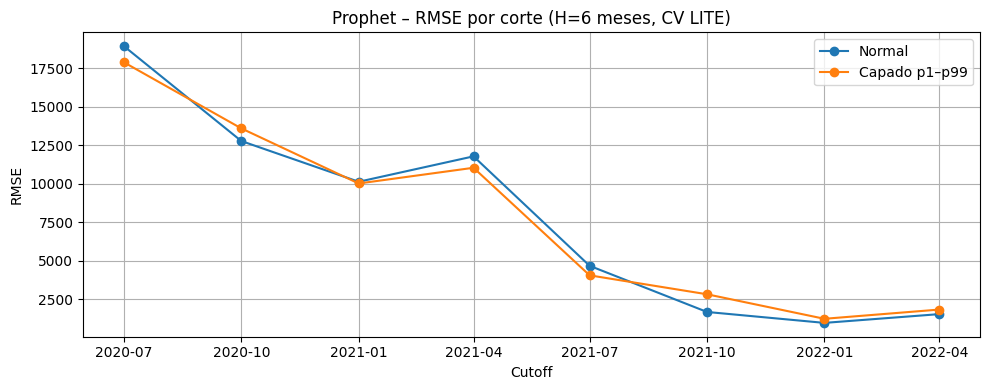

In [16]:
# ==== Prophet CV LITE (rápido) para un horizonte H — versión robusta ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from prophet import Prophet
except Exception:
    !pip -q install prophet
    from prophet import Prophet

# ---------- 0) df_monthly desde totales_df ----------
assert 'totales_df' in globals(), "Falta 'totales_df' con ['fecha','patentamientos']"
df_monthly = (
    totales_df[['fecha','patentamientos']]
    .rename(columns={'fecha':'ds','patentamientos':'y'})
    .sort_values('ds')
    .copy()
)
df_monthly['ds'] = pd.to_datetime(df_monthly['ds'])
df_monthly['y']  = pd.to_numeric(df_monthly['y'], errors='coerce')
df_monthly = df_monthly.set_index('ds').asfreq('MS')
if df_monthly['y'].isna().any():
    df_monthly['y'] = df_monthly['y'].interpolate('linear')
df_monthly = df_monthly.reset_index()

# Blindaje por si el reset_index deja 'index' en vez de 'ds'
if 'ds' not in df_monthly.columns:
    df_monthly = df_monthly.rename(columns={'index':'ds'})
df_monthly = df_monthly[['ds','y']].copy()
df_monthly['ds'] = pd.to_datetime(df_monthly['ds'])
df_monthly['y']  = pd.to_numeric(df_monthly['y'], errors='coerce')

print(f"[INFO] df_monthly: {df_monthly['ds'].min().date()} → {df_monthly['ds'].max().date()} | n={len(df_monthly)}")

# ---------- Parámetros LITE ----------
H = 6                  # <- corré 3, luego cambiá a 6 y 12 en corridas separadas
INITIAL_YEARS = 3
PERIOD_MONTHS = 3
MAX_CUTOFFS = 8
USE_CAP = True         # capado p1–p99

# ---------- Helpers ----------
def _fit_predict_prophet(train_df, horizon_m, cps=0.3, sps=1.0):
    t = train_df[['ds','y']].copy()
    if 'ds' not in t.columns: t = t.rename(columns={'index':'ds'})
    t['ds'] = pd.to_datetime(t['ds'])
    t['y']  = pd.to_numeric(t['y'], errors='coerce').fillna(0)

    seasonality_mode = 'multiplicative' if (t['y'] > 0).all() else 'additive'
    m = Prophet(
        seasonality_mode=seasonality_mode,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=cps,
        seasonality_prior_scale=sps,
        changepoint_range=0.9
    )
    m.fit(t[['ds','y']])
    future = m.make_future_dataframe(periods=horizon_m, freq='MS')
    fc = m.predict(future)
    pred = fc[['ds','yhat']].tail(horizon_m).reset_index(drop=True)
    return pred

def _metrics(y_true, y_hat):
    y_true = pd.Series(y_true).astype(float).values
    y_hat  = pd.Series(y_hat).astype(float).values
    err = y_true - y_hat
    rmse = float(np.sqrt(np.mean(err**2)))
    mae  = float(np.mean(np.abs(err)))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask] - y_hat[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def _winsorize_train(train_df, q_low=0.01, q_high=0.99):
    t = train_df[['ds','y']].copy()
    if 'ds' not in t.columns: t = t.rename(columns={'index':'ds'})
    t['y'] = pd.to_numeric(t['y'], errors='coerce')
    p_low, p_high = t['y'].quantile([q_low, q_high])
    t['y'] = t['y'].clip(p_low, p_high)
    return t, p_low, p_high

# ---------- 1) Preparar cortes ----------
s = df_monthly.copy().sort_values('ds')
s = s.set_index('ds').asfreq('MS').reset_index()
if 'ds' not in s.columns:
    s = s.rename(columns={'index':'ds'})
s['ds'] = pd.to_datetime(s['ds'])
s['y']  = pd.to_numeric(s['y'], errors='coerce')

start = s['ds'].min() + pd.DateOffset(years=INITIAL_YEARS)
last  = s['ds'].max()
cutoffs = []
t = start
while t + pd.DateOffset(months=H) <= last:
    cutoffs.append(t)
    t += pd.DateOffset(months=PERIOD_MONTHS)

cutoffs = cutoffs[-MAX_CUTOFFS:]
print(f"[INFO] Cutoffs utilizados: {len(cutoffs)} (periodicidad={PERIOD_MONTHS}m, últimos {MAX_CUTOFFS})")

# ---------- 2) CV Rolling: Normal vs (opcional) Capado p1–p99 ----------
rows_norm, rows_cap = [], []

for cutoff in cutoffs:
    train = s[s['ds'] <= cutoff][['ds','y']].copy()

    # Índices de test
    test_idx = pd.date_range(cutoff + pd.DateOffset(months=1),
                             cutoff + pd.DateOffset(months=H), freq='MS')
    test = s.set_index('ds').loc[test_idx, ['y']].reset_index()

    # Blindaje de columnas en test
    if 'ds' not in test.columns:
        test = test.rename(columns={'index':'ds'})
    test['ds'] = pd.to_datetime(test['ds'])
    if len(test) < H:
        continue

    # Prophet NORMAL
    pred_n = _fit_predict_prophet(train, H)
    pred_n['ds'] = test['ds'].values  # alinear por posición del horizonte
    rmse, mae, mape = _metrics(test['y'].values, pred_n['yhat'].values)
    rows_norm.append({'cutoff': cutoff, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})

    # Prophet CAPADO p1–p99
    if USE_CAP:
        train_cap, pL, pH = _winsorize_train(train, 0.01, 0.99)
        pred_c = _fit_predict_prophet(train_cap, H)
        pred_c['ds'] = test['ds'].values
        rmse_c, mae_c, mape_c = _metrics(test['y'].values, pred_c['yhat'].values)
        rows_cap.append({'cutoff': cutoff, 'RMSE': rmse_c, 'MAE': mae_c, 'MAPE': mape_c,
                         'p_low': float(pL), 'p_high': float(pH)})

metrics_normal = pd.DataFrame(rows_norm).sort_values('cutoff').reset_index(drop=True)
metrics_cap    = pd.DataFrame(rows_cap).sort_values('cutoff').reset_index(drop=True) if USE_CAP else pd.DataFrame()

# ---------- 3) Resumen ----------
def _avg(df):
    return {k: float(df[k].mean()) for k in ['RMSE','MAE','MAPE']} if not df.empty else {'RMSE':np.nan,'MAE':np.nan,'MAPE':np.nan}

summary_rows = [{'horizon_m': H, 'model': 'Prophet Normal', **_avg(metrics_normal)}]
if USE_CAP:
    summary_rows.append({'horizon_m': H, 'model': 'Prophet Capado p1–p99', **_avg(metrics_cap)})
summary = pd.DataFrame(summary_rows)
print("\n==== RESUMEN LITE ====")
print(summary)

# ---------- 4) Gráfico RMSE por corte ----------
plt.figure(figsize=(10,4))
if not metrics_normal.empty:
    plt.plot(metrics_normal['cutoff'], metrics_normal['RMSE'], marker='o', label='Normal')
if USE_CAP and not metrics_cap.empty:
    plt.plot(metrics_cap['cutoff'], metrics_cap['RMSE'], marker='o', label='Capado p1–p99')
plt.title(f'Prophet – RMSE por corte (H={H} meses, CV LITE)')
plt.xlabel('Cutoff'); plt.ylabel('RMSE'); plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/0pxyl3e7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/oykax7cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56448', 'data', 'file=/tmp/tmpmyso1b4b/0pxyl3e7.json', 'init=/tmp/tmpmyso1b4b/oykax7cd.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelmva2pcr9/prophet_model-20250816125028.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[INFO] df_monthly: 2014-01-01 → 2022-11-01 | n=107
[INFO] Cutoffs utilizados: 8 (periodicidad=3m, últimos 8)


12:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/2tcjymnj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/b6qplqqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20361', 'data', 'file=/tmp/tmpmyso1b4b/2tcjymnj.json', 'init=/tmp/tmpmyso1b4b/b6qplqqc.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelnlo1rswn/prophet_model-20250816125030.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/vlhfe4wz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/lzt1gafb.json
DEBUG:cmdstanpy:id


==== RESUMEN LITE ====
   horizon_m                  model          RMSE           MAE       MAPE
0         12         Prophet Normal  12940.050067  11828.707551  44.709039
1         12  Prophet Capado p1–p99  12370.856926  11204.879782  42.889142


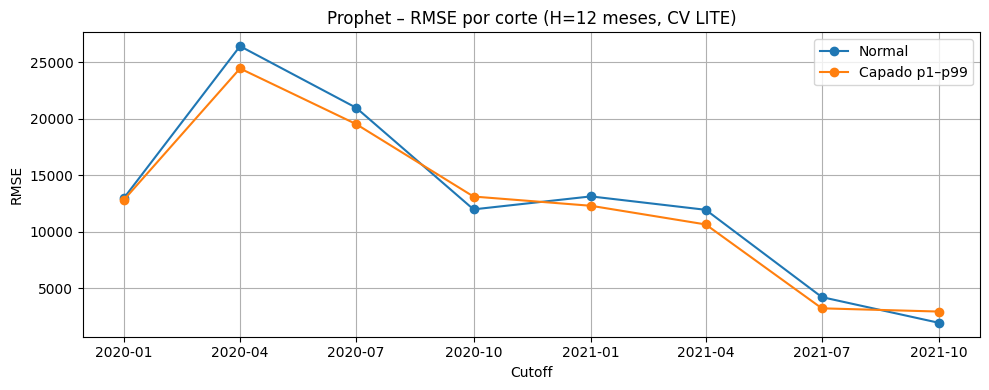

In [17]:
# ==== Prophet CV LITE (rápido) para un horizonte H — versión robusta ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from prophet import Prophet
except Exception:
    !pip -q install prophet
    from prophet import Prophet

# ---------- 0) df_monthly desde totales_df ----------
assert 'totales_df' in globals(), "Falta 'totales_df' con ['fecha','patentamientos']"
df_monthly = (
    totales_df[['fecha','patentamientos']]
    .rename(columns={'fecha':'ds','patentamientos':'y'})
    .sort_values('ds')
    .copy()
)
df_monthly['ds'] = pd.to_datetime(df_monthly['ds'])
df_monthly['y']  = pd.to_numeric(df_monthly['y'], errors='coerce')
df_monthly = df_monthly.set_index('ds').asfreq('MS')
if df_monthly['y'].isna().any():
    df_monthly['y'] = df_monthly['y'].interpolate('linear')
df_monthly = df_monthly.reset_index()

# Blindaje por si el reset_index deja 'index' en vez de 'ds'
if 'ds' not in df_monthly.columns:
    df_monthly = df_monthly.rename(columns={'index':'ds'})
df_monthly = df_monthly[['ds','y']].copy()
df_monthly['ds'] = pd.to_datetime(df_monthly['ds'])
df_monthly['y']  = pd.to_numeric(df_monthly['y'], errors='coerce')

print(f"[INFO] df_monthly: {df_monthly['ds'].min().date()} → {df_monthly['ds'].max().date()} | n={len(df_monthly)}")

# ---------- Parámetros LITE ----------
H = 12                 # <- corré 3, luego cambiá a 6 y 12 en corridas separadas
INITIAL_YEARS = 3
PERIOD_MONTHS = 3
MAX_CUTOFFS = 8
USE_CAP = True         # capado p1–p99

# ---------- Helpers ----------
def _fit_predict_prophet(train_df, horizon_m, cps=0.3, sps=1.0):
    t = train_df[['ds','y']].copy()
    if 'ds' not in t.columns: t = t.rename(columns={'index':'ds'})
    t['ds'] = pd.to_datetime(t['ds'])
    t['y']  = pd.to_numeric(t['y'], errors='coerce').fillna(0)

    seasonality_mode = 'multiplicative' if (t['y'] > 0).all() else 'additive'
    m = Prophet(
        seasonality_mode=seasonality_mode,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=cps,
        seasonality_prior_scale=sps,
        changepoint_range=0.9
    )
    m.fit(t[['ds','y']])
    future = m.make_future_dataframe(periods=horizon_m, freq='MS')
    fc = m.predict(future)
    pred = fc[['ds','yhat']].tail(horizon_m).reset_index(drop=True)
    return pred

def _metrics(y_true, y_hat):
    y_true = pd.Series(y_true).astype(float).values
    y_hat  = pd.Series(y_hat).astype(float).values
    err = y_true - y_hat
    rmse = float(np.sqrt(np.mean(err**2)))
    mae  = float(np.mean(np.abs(err)))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask] - y_hat[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def _winsorize_train(train_df, q_low=0.01, q_high=0.99):
    t = train_df[['ds','y']].copy()
    if 'ds' not in t.columns: t = t.rename(columns={'index':'ds'})
    t['y'] = pd.to_numeric(t['y'], errors='coerce')
    p_low, p_high = t['y'].quantile([q_low, q_high])
    t['y'] = t['y'].clip(p_low, p_high)
    return t, p_low, p_high

# ---------- 1) Preparar cortes ----------
s = df_monthly.copy().sort_values('ds')
s = s.set_index('ds').asfreq('MS').reset_index()
if 'ds' not in s.columns:
    s = s.rename(columns={'index':'ds'})
s['ds'] = pd.to_datetime(s['ds'])
s['y']  = pd.to_numeric(s['y'], errors='coerce')

start = s['ds'].min() + pd.DateOffset(years=INITIAL_YEARS)
last  = s['ds'].max()
cutoffs = []
t = start
while t + pd.DateOffset(months=H) <= last:
    cutoffs.append(t)
    t += pd.DateOffset(months=PERIOD_MONTHS)

cutoffs = cutoffs[-MAX_CUTOFFS:]
print(f"[INFO] Cutoffs utilizados: {len(cutoffs)} (periodicidad={PERIOD_MONTHS}m, últimos {MAX_CUTOFFS})")

# ---------- 2) CV Rolling: Normal vs (opcional) Capado p1–p99 ----------
rows_norm, rows_cap = [], []

for cutoff in cutoffs:
    train = s[s['ds'] <= cutoff][['ds','y']].copy()

    # Índices de test
    test_idx = pd.date_range(cutoff + pd.DateOffset(months=1),
                             cutoff + pd.DateOffset(months=H), freq='MS')
    test = s.set_index('ds').loc[test_idx, ['y']].reset_index()

    # Blindaje de columnas en test
    if 'ds' not in test.columns:
        test = test.rename(columns={'index':'ds'})
    test['ds'] = pd.to_datetime(test['ds'])
    if len(test) < H:
        continue

    # Prophet NORMAL
    pred_n = _fit_predict_prophet(train, H)
    pred_n['ds'] = test['ds'].values  # alinear por posición del horizonte
    rmse, mae, mape = _metrics(test['y'].values, pred_n['yhat'].values)
    rows_norm.append({'cutoff': cutoff, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})

    # Prophet CAPADO p1–p99
    if USE_CAP:
        train_cap, pL, pH = _winsorize_train(train, 0.01, 0.99)
        pred_c = _fit_predict_prophet(train_cap, H)
        pred_c['ds'] = test['ds'].values
        rmse_c, mae_c, mape_c = _metrics(test['y'].values, pred_c['yhat'].values)
        rows_cap.append({'cutoff': cutoff, 'RMSE': rmse_c, 'MAE': mae_c, 'MAPE': mape_c,
                         'p_low': float(pL), 'p_high': float(pH)})

metrics_normal = pd.DataFrame(rows_norm).sort_values('cutoff').reset_index(drop=True)
metrics_cap    = pd.DataFrame(rows_cap).sort_values('cutoff').reset_index(drop=True) if USE_CAP else pd.DataFrame()

# ---------- 3) Resumen ----------
def _avg(df):
    return {k: float(df[k].mean()) for k in ['RMSE','MAE','MAPE']} if not df.empty else {'RMSE':np.nan,'MAE':np.nan,'MAPE':np.nan}

summary_rows = [{'horizon_m': H, 'model': 'Prophet Normal', **_avg(metrics_normal)}]
if USE_CAP:
    summary_rows.append({'horizon_m': H, 'model': 'Prophet Capado p1–p99', **_avg(metrics_cap)})
summary = pd.DataFrame(summary_rows)
print("\n==== RESUMEN LITE ====")
print(summary)

# ---------- 4) Gráfico RMSE por corte ----------
plt.figure(figsize=(10,4))
if not metrics_normal.empty:
    plt.plot(metrics_normal['cutoff'], metrics_normal['RMSE'], marker='o', label='Normal')
if USE_CAP and not metrics_cap.empty:
    plt.plot(metrics_cap['cutoff'], metrics_cap['RMSE'], marker='o', label='Capado p1–p99')
plt.title(f'Prophet – RMSE por corte (H={H} meses, CV LITE)')
plt.xlabel('Cutoff'); plt.ylabel('RMSE'); plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/vxtts1zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/40aeewka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21287', 'data', 'file=/tmp/tmpmyso1b4b/vxtts1zw.json', 'init=/tmp/tmpmyso1b4b/40aeewka.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelpags_awn/prophet_model-20250816125049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 81 forecasts with cutoffs between 2016-01-06 00:00:00 and 2022-08-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bdfd2d25590>


[INFO] df_monthly: 2014-01-01 → 2022-11-01 | n=107
[INFO] Ejecutando Prophet normal...


INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/9sde0kog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/uo9jrwbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/2_xrmg3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/6fltgius.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96243', 'data', 'file=/tmp/tmpmyso1b4b/uo9jrwbb.json', 'init=/tmp/tmpmyso1b4b/2_xrmg3_.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_model_wc2rsby/prophet_model-20250816125049.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:50:49 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: None
INFO:cmdstanpy:Chain [1] start 

[INFO] Ejecutando Prophet capado p1–p99...


INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/6l1fkuiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/rldqw9ub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/9vsg_ml7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmyso1b4b/ax406_7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9545', 'data', 'file=/tmp/tmpmyso1b4b/6l1fkuiq.json', 'init=/tmp/tmpmyso1b4b/9vsg_ml7.json', 'output', 'file=/tmp/tmpmyso1b4b/prophet_modelm_uoqeu8/prophet_model-20250816125227.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: None
INFO:cmdstanpy:Chain [1] start p


==== RESUMEN CROSS-VALIDATION ====
   horizon_m          RMSE           MAE      MAPE                  model
0          3  18187.105939  14731.566165  0.425358         Prophet Normal
1          6  19906.850403  15740.310566  0.436583         Prophet Normal
2         12  23508.954132  19226.128845  0.548207         Prophet Normal
3          3  16960.861834  13419.132392  0.341604  Prophet Capado p1–p99
4          6  18606.854534  14404.677697  0.361846  Prophet Capado p1–p99
5         12  21889.927085  17555.248642  0.459268  Prophet Capado p1–p99


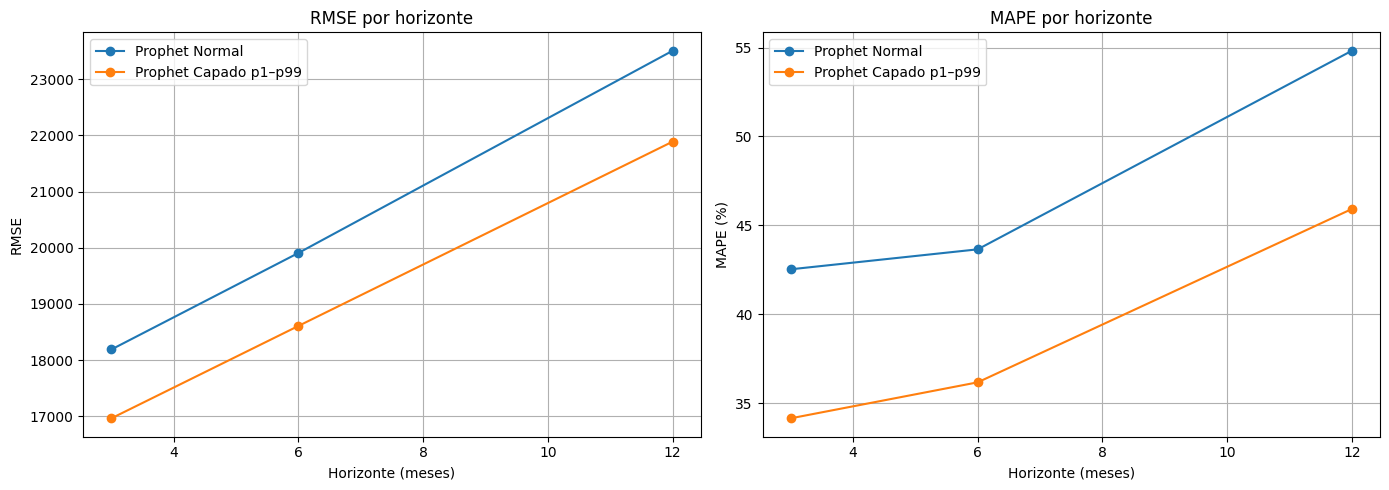

In [18]:
# ======================
# 1. LIBRERÍAS
# ======================
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ======================
# 2. DF MENSUAL (YA LIMPIO)
# ======================
df_monthly['ds'] = pd.to_datetime(df_monthly['ds'])
df_monthly = df_monthly.sort_values('ds').reset_index(drop=True)
print(f"[INFO] df_monthly: {df_monthly['ds'].min().date()} → {df_monthly['ds'].max().date()} | n={len(df_monthly)}")

# Helper: meses → 'X days' (≈30.44 días/mes)
def months_to_days_str(m):
    days = int(round(m * 365.25 / 12.0))
    return f"{days} days"

# ======================
# 3. FUNCIÓN PARA PROPHET + CROSS-VALIDATION (CORREGIDA)
# ======================
def run_prophet_cv(df, clip_outliers=False, q_low=0.01, q_high=0.99):
    df_model = df.copy()

    # Clip de outliers si aplica (sobre toda la historia del modelo)
    if clip_outliers:
        p_low, p_high = df_model['y'].quantile([q_low, q_high])
        df_model['y'] = df_model['y'].clip(lower=p_low, upper=p_high)

    # Modelo Prophet
    m = Prophet(
        seasonality_mode='multiplicative',
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False
    )
    m.fit(df_model)

    results = []
    for horizon_m in [3, 6, 12]:
        horizon_str = months_to_days_str(horizon_m)   # e.g., '91 days' para 3m
        period_str  = months_to_days_str(1)           # paso ~ mensual
        initial_str = months_to_days_str(24)          # ~24 meses de inicial (ajustable)

        df_cv = cross_validation(
            m,
            horizon=horizon_str,
            period=period_str,
            initial=initial_str,
            parallel="processes"
        )
        df_perf = performance_metrics(df_cv)

        results.append({
            "horizon_m": horizon_m,
            "RMSE": df_perf['rmse'].mean(),
            "MAE":  df_perf['mae'].mean(),
            "MAPE": df_perf['mape'].mean()
        })

    return pd.DataFrame(results)

# ======================
# 4. CORRER AMBOS MODELOS
# ======================
print("[INFO] Ejecutando Prophet normal...")
res_normal = run_prophet_cv(df_monthly, clip_outliers=False)

print("[INFO] Ejecutando Prophet capado p1–p99...")
res_capado = run_prophet_cv(df_monthly, clip_outliers=True, q_low=0.01, q_high=0.99)

res_normal['model'] = "Prophet Normal"
res_capado['model'] = "Prophet Capado p1–p99"

# ======================
# 5. TABLA RESUMEN
# ======================
resumen = pd.concat([res_normal, res_capado], ignore_index=True)
print("\n==== RESUMEN CROSS-VALIDATION ====")
print(resumen)

# ======================
# 6. GRÁFICOS COMPARATIVOS
# ======================
fig, axs = plt.subplots(1, 2, figsize=(14,5))

# RMSE
for model in resumen['model'].unique():
    data = resumen[resumen['model'] == model]
    axs[0].plot(data['horizon_m'], data['RMSE'], marker='o', label=model)
axs[0].set_title("RMSE por horizonte")
axs[0].set_xlabel("Horizonte (meses)")
axs[0].set_ylabel("RMSE")
axs[0].legend()
axs[0].grid(True)

# MAPE (en %)
for model in resumen['model'].unique():
    data = resumen[resumen['model'] == model]
    axs[1].plot(data['horizon_m'], data['MAPE']*100, marker='o', label=model)
axs[1].set_title("MAPE por horizonte")
axs[1].set_xlabel("Horizonte (meses)")
axs[1].set_ylabel("MAPE (%)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


[INFO] Serie: 2014-01-01 → 2022-11-01 | n=107

[Decomposición] modelo=multiplicative


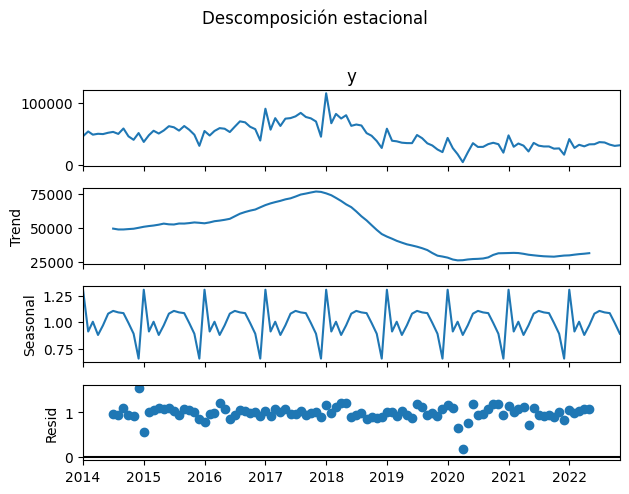


[ADF tests]
ADF cruda: stat=-1.41, p=0.5780
ADF diff(1): stat=-2.16, p=0.2205
ADF diff(12): stat=-2.22, p=0.1989
ADF diff(12)+diff(1): stat=-10.30, p=0.0000
ADF base para d (ya sin S): stat=-2.22, p=0.1989
ADF base para d (ya sin S): stat=-2.22, p=0.1989

[Sugerencia] d=1, D=1 (s=12)

[TOP modelos por AIC]
                  cfg        AIC
0  (2, 1, 2, 1, 1, 1) -41.985902
1  (1, 1, 2, 1, 1, 1) -41.243530
2  (2, 1, 3, 1, 1, 1) -40.005879
3  (1, 1, 3, 1, 1, 1) -39.360954
4  (3, 1, 0, 1, 1, 1) -38.563539
5  (3, 1, 3, 1, 1, 1) -38.211349
6  (3, 1, 2, 1, 1, 1) -38.032241
7  (0, 1, 1, 1, 1, 1) -37.980500
8  (1, 1, 0, 1, 1, 1) -37.615673
9  (0, 1, 0, 1, 1, 1) -37.435312

[Mejor global] cfg=(2, 1, 2, 1, 1, 1), AIC=-42.0, meta={'cap': (16156.6, 89994.43999999999), 'log1p': True}


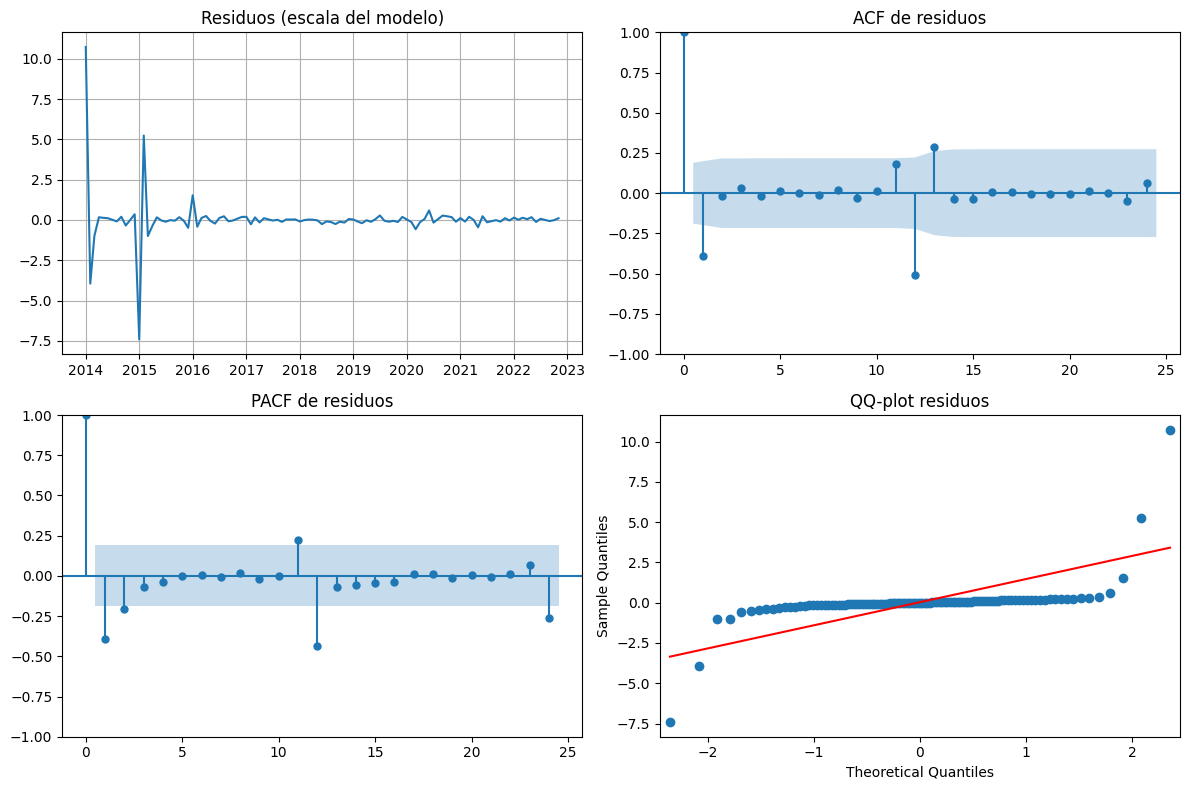


[Ljung-Box p-val] (alto = OK, sin autocorr):
      lb_stat     lb_pvalue
12  53.349971  3.568853e-07
24  65.053403  1.195462e-05

[ADF tests]
ADF cruda: stat=-1.46, p=0.5530
ADF diff(1): stat=-2.09, p=0.2465
ADF diff(12): stat=-2.18, p=0.2148
ADF diff(12)+diff(1): stat=-10.09, p=0.0000
ADF base para d (ya sin S): stat=-2.18, p=0.2148
ADF base para d (ya sin S): stat=-2.18, p=0.2148

[Sugerencia] d=1, D=1 (s=12)

[TOP modelos por AIC]
                  cfg        AIC
0  (2, 1, 2, 1, 1, 1) -37.368213
1  (1, 1, 2, 1, 1, 1) -36.396167
2  (2, 1, 3, 1, 1, 1) -35.104314
3  (3, 1, 0, 1, 1, 1) -34.262499
4  (0, 1, 1, 1, 1, 1) -33.421168
5  (3, 1, 3, 1, 1, 1) -33.296676
6  (3, 1, 2, 1, 1, 1) -33.138943
7  (1, 1, 0, 1, 1, 1) -33.131267
8  (0, 1, 0, 1, 1, 1) -32.951632
9  (1, 1, 1, 1, 1, 1) -32.637656


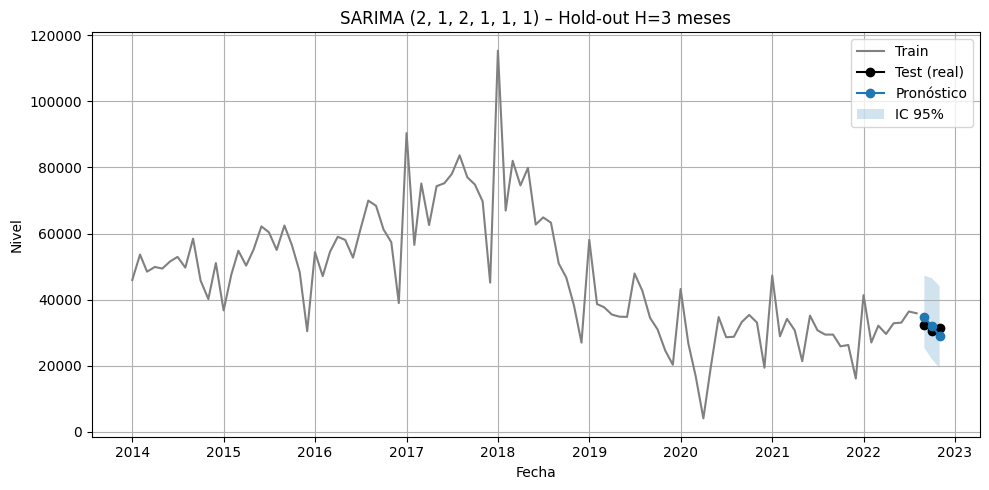


[ADF tests]
ADF cruda: stat=-1.47, p=0.5500
ADF diff(1): stat=-2.04, p=0.2676
ADF diff(12): stat=-2.13, p=0.2318
ADF diff(12)+diff(1): stat=-9.78, p=0.0000
ADF base para d (ya sin S): stat=-2.13, p=0.2318
ADF base para d (ya sin S): stat=-2.13, p=0.2318

[Sugerencia] d=1, D=1 (s=12)

[TOP modelos por AIC]
                  cfg        AIC
0  (2, 1, 3, 1, 1, 1) -30.888239
1  (0, 1, 0, 1, 1, 1) -30.745117
2  (3, 1, 2, 1, 1, 1) -30.539020
3  (1, 1, 0, 1, 1, 1) -30.385270
4  (0, 1, 1, 1, 1, 1) -30.262897
5  (3, 1, 0, 1, 1, 1) -30.248785
6  (1, 1, 3, 1, 1, 1) -29.952635
7  (1, 1, 1, 1, 1, 1) -29.442002
8  (2, 1, 0, 1, 1, 1) -28.896202
9  (2, 1, 3, 0, 1, 1) -28.836949


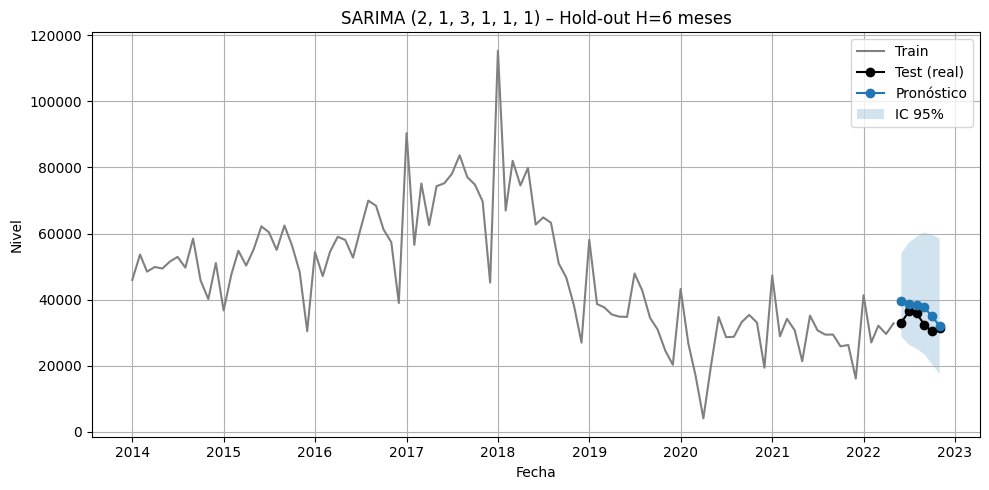


[ADF tests]
ADF cruda: stat=-0.85, p=0.8038
ADF diff(1): stat=-1.97, p=0.2993
ADF diff(12): stat=-2.07, p=0.2568
ADF diff(12)+diff(1): stat=-9.50, p=0.0000
ADF base para d (ya sin S): stat=-2.07, p=0.2568
ADF base para d (ya sin S): stat=-2.07, p=0.2568

[Sugerencia] d=1, D=1 (s=12)

[TOP modelos por AIC]
                  cfg        AIC
0  (2, 1, 3, 0, 1, 1) -27.215831
1  (3, 1, 1, 1, 1, 1) -25.333267
2  (3, 1, 3, 0, 1, 1) -25.237499
3  (3, 1, 0, 1, 1, 1) -24.892534
4  (0, 1, 0, 1, 1, 1) -24.573554
5  (2, 1, 3, 1, 1, 1) -24.412209
6  (0, 1, 1, 1, 1, 1) -24.398821
7  (1, 1, 0, 1, 1, 1) -24.185033
8  (1, 1, 1, 1, 1, 1) -23.779671
9  (0, 1, 1, 0, 1, 1) -23.611995


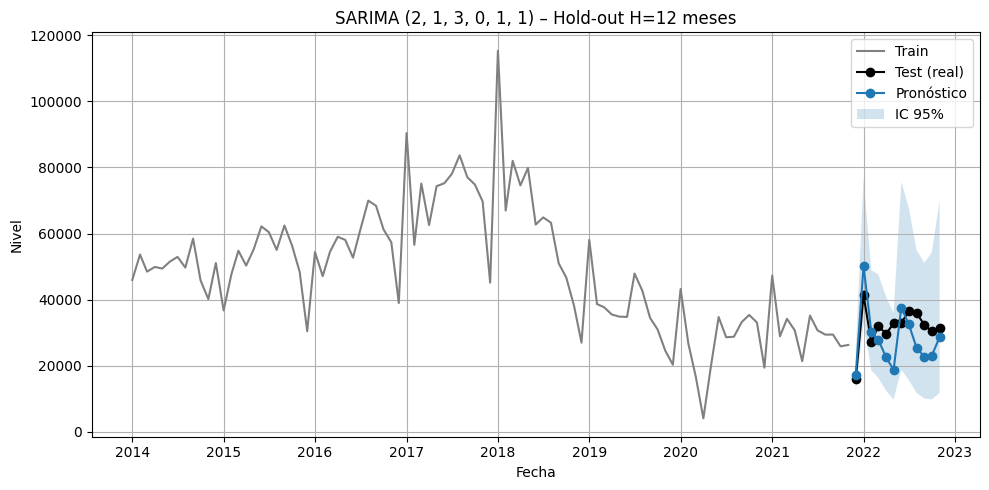


=== HOLD-OUT SARIMA (completo) ===
   horizon_m                                 model         RMSE          MAE  \
0          3  SARIMA(2, 1, 2, 1, 1, 1) (AIC=-37.4)  2056.691094  2033.765375   
1          6  SARIMA(2, 1, 3, 1, 1, 1) (AIC=-30.9)  4150.499680  3665.396231   
2         12  SARIMA(2, 1, 3, 0, 1, 1) (AIC=-27.2)  7393.708641  6432.413052   

        MAPE  
0   6.465746  
1  11.154135  
2  19.724488  


In [19]:
# ============================================
# SARIMA COMPLETO (como el de Leandro)
# - Decomp + ADF + Grid AIC + Residuos + Hold-out (3/6/12)
# Opcional: capado p1–p99 y log1p
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------- 0) Serie mensual segura (df_monthly) ----------
# Si no existe df_monthly, lo armamos desde totales_df
if 'df_monthly' not in globals():
    assert 'totales_df' in globals(), "Falta 'totales_df' con ['fecha','patentamientos']"
    df_monthly = (
        totales_df[['fecha','patentamientos']]
        .rename(columns={'fecha':'ds','patentamientos':'y'})
        .sort_values('ds')
        .copy()
    )

# Normalizar columnas/tipos
dfm = df_monthly.copy()
if 'ds' not in dfm.columns:
    dfm = dfm.reset_index().rename(columns={'index':'ds'})
dfm['ds'] = pd.to_datetime(dfm['ds'])
dfm['y']  = pd.to_numeric(dfm['y'], errors='coerce')

# Frecuencia MS y relleno suave si hubiera huecos
dfm = dfm.set_index('ds').asfreq('MS')
if dfm['y'].isna().any():
    dfm['y'] = dfm['y'].interpolate('linear')
y_full = dfm['y'].astype(float)
print(f"[INFO] Serie: {y_full.index.min().date()} → {y_full.index.max().date()} | n={len(y_full)}")

# ---------- Parámetros toggles ----------
USE_CAP = True     # capado p1–p99 en TRAIN
USE_LOG = True     # modelar en log1p (vuelta con expm1)
S = 12             # estacionalidad mensual

# ---------- Helpers ----------
def winsorize(s: pd.Series, q_low=0.01, q_high=0.99):
    pL, pH = s.quantile([q_low, q_high])
    return s.clip(pL, pH), float(pL), float(pH)

def metrics(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask]-y_pred[mask])/y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def choose_d_D(y: pd.Series, s=12):
    """Tests ADF básicos para sugerir d y D."""
    def _adf(x, name):
        x = pd.Series(x).dropna()
        if len(x) < 20:
            return np.nan, np.nan
        stat, p = adfuller(x, autolag='AIC')[:2]
        print(f"ADF {name}: stat={stat:.2f}, p={p:.4f}")
        return stat, p

    print("\n[ADF tests]")
    _, p_raw  = _adf(y, "cruda")
    _, p_d1   = _adf(y.diff(1), "diff(1)")
    _, p_s1   = _adf(y.diff(s), "diff(12)")
    _, p_s1d1 = _adf(y.diff(s).diff(1), "diff(12)+diff(1)")

    # regla simple:
    D = 1 if (not np.isnan(p_s1)) and (p_s1 > 0.05) else 0
    # si tras quitar estacionalidad sigue no estacionaria -> d=1
    base = y.diff(s) if D==1 else y
    d = 1 if (not np.isnan(_adf(base, "base para d (ya sin S)" )[1])) and (_adf(base, "base para d (ya sin S)" )[1] > 0.05) else 0

    print(f"\n[Sugerencia] d={d}, D={D} (s={s})")
    return int(d), int(D)

def fit_grid_aic(y_train: pd.Series, d:int, D:int, s:int=12, use_cap=True, use_log=True):
    """Grid pequeño por AIC y fit final. Devuelve (fit, cfg, aic, meta)."""
    y_tr = y_train.copy()
    meta = {}

    if use_cap:
        y_tr, pL, pH = winsorize(y_tr, 0.01, 0.99)
        meta.update({'cap': (pL, pH)})
    if use_log:
        y_tr = np.log1p(y_tr)
        meta.update({'log1p': True})
    else:
        meta.update({'log1p': False})

    grid_pq = [0,1,2,3]
    grid_PQ = [0,1]
    results = []
    best_aic = np.inf; best_cfg=None; best_fit=None

    for p,q in product(grid_pq, grid_pq):
        for P,Q in product(grid_PQ, grid_PQ):
            try:
                fit = SARIMAX(y_tr,
                              order=(p,d,q),
                              seasonal_order=(P,D,Q,s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
                aic = fit.aic
                results.append(((p,d,q,P,D,Q), aic))
                if aic < best_aic:
                    best_aic, best_cfg, best_fit = aic, (p,d,q,P,D,Q), fit
            except Exception:
                continue

    res_df = (pd.DataFrame(results, columns=['cfg','AIC'])
                .sort_values('AIC').reset_index(drop=True))
    print("\n[TOP modelos por AIC]")
    print(res_df.head(10))
    return best_fit, best_cfg, float(best_aic), meta, res_df

def predict_out_of_sample(fit, steps, meta, index_like):
    fc = fit.get_forecast(steps=steps)
    yhat = fc.predicted_mean
    if meta.get('log1p', False):
        yhat = np.expm1(yhat)
    yhat.index = index_like
    ci = fc.conf_int()
    if meta.get('log1p', False):
        ci = np.expm1(ci)
    ci.index = index_like
    return yhat, ci

# ---------- 1) Decomposición ----------
model_dec = 'multiplicative' if (y_full>0).all() else 'additive'
print(f"\n[Decomposición] modelo={model_dec}")
dec = seasonal_decompose(y_full, period=S, model=model_dec)
dec.plot(); plt.suptitle('Descomposición estacional', y=1.02); plt.tight_layout(); plt.show()

# ---------- 2) Tests ADF y elección d,D ----------
d, D = choose_d_D(y_full, s=S)

# ---------- 3) Grid-search por AIC en TODA la historia (para diagnóstico) ----------
fit_all, cfg_all, aic_all, meta_all, aic_table = fit_grid_aic(y_full, d, D, s=S, use_cap=USE_CAP, use_log=USE_LOG)
print(f"\n[Mejor global] cfg={cfg_all}, AIC={aic_all:.1f}, meta={meta_all}")

# ---------- 4) Diagnóstico de RESIDUOS (del mejor global) ----------
# Aseguro que resid sea una Serie (con índice) y sin NaN
import pandas as pd
resid = pd.Series(fit_all.resid).dropna()

# Grilla 2x2 y la “aplanamos” para indexar linealmente
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

# 1) Serie de residuos
axes[0].plot(resid)
axes[0].set_title('Residuos (escala del modelo)')
axes[0].grid(True)

# 2) ACF de residuos
plot_acf(resid, lags=24, ax=axes[1])
axes[1].set_title('ACF de residuos')

# 3) PACF de residuos
plot_pacf(resid, lags=24, ax=axes[2])
axes[2].set_title('PACF de residuos')

# 4) QQ-plot (normalidad aprox.)
from statsmodels.graphics.gofplots import qqplot
qqplot(resid, line='s', ax=axes[3])
axes[3].set_title('QQ-plot residuos')

plt.tight_layout()
plt.show()

# Ljung–Box (p alto ⇒ sin autocorrelación remanente)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb = acorr_ljungbox(resid, lags=[12, 24], return_df=True)
print("\n[Ljung-Box p-val] (alto = OK, sin autocorr):")
print(lb)

# ---------- 5) HOLD-OUT H={3,6,12} con refit+grid y métricas ----------
hold_rows = []
for H in [3,6,12]:
    train = y_full.iloc[:-H]
    test  = y_full.iloc[-H:]
    dH, DH = choose_d_D(train, s=S)  # recalcular sobre el train
    fit, cfg, aic, meta, _ = fit_grid_aic(train, dH, DH, s=S, use_cap=USE_CAP, use_log=USE_LOG)
    yhat, ci = predict_out_of_sample(fit, H, meta, test.index)
    rmse, mae, mape = metrics(test.values, yhat.values)
    hold_rows.append({'horizon_m': H, 'model': f"SARIMA{cfg} (AIC={aic:.1f})", 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})

    # gráfico por cada H
    plt.figure(figsize=(10,5))
    plt.plot(train.index, train.values, label='Train', color='gray')
    plt.plot(test.index,  test.values,  label='Test (real)', color='black', marker='o')
    plt.plot(yhat.index,  yhat.values,  label='Pronóstico', color='tab:blue', marker='o')
    try:
        plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2, label='IC 95%')
    except Exception:
        pass
    plt.title(f"SARIMA {cfg} – Hold-out H={H} meses")
    plt.xlabel('Fecha'); plt.ylabel('Nivel'); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

hold_df = pd.DataFrame(hold_rows)
print("\n=== HOLD-OUT SARIMA (completo) ===")
print(hold_df)


[INFO] Serie: 2014-01-01 → 2022-11-01 | n=107

=== Ajuste global con grilla ampliada ===
[ADF] cruda p=0.5780 | diff(1) p=0.2205 | diff(12) p=0.1989 | diff(12)+diff(1) p=0.0000
[Sugerencia] d=1, D=1 (s=12)

[TOP AIC – ampliado]
                   cfg        AIC
0   (2, 1, 2, 1, 1, 1) -41.985902
1   (1, 1, 2, 1, 1, 1) -41.243530
2   (2, 1, 3, 1, 1, 1) -40.005879
3   (1, 1, 3, 1, 1, 1) -39.360954
4   (3, 1, 0, 1, 1, 1) -38.563539
5   (3, 1, 3, 1, 1, 1) -38.211349
6   (3, 1, 2, 1, 1, 1) -38.032241
7   (0, 1, 1, 1, 1, 1) -37.980500
8   (1, 1, 0, 1, 1, 1) -37.615673
9   (0, 1, 0, 1, 1, 1) -37.435312
10  (1, 1, 1, 1, 1, 1) -37.278847
11  (3, 1, 1, 1, 1, 1) -36.679584

[Mejor global] cfg=(2, 1, 2, 1, 1, 1), AIC=-42.0, meta={'cap': (16156.6, 89994.43999999999), 'log1p': True}


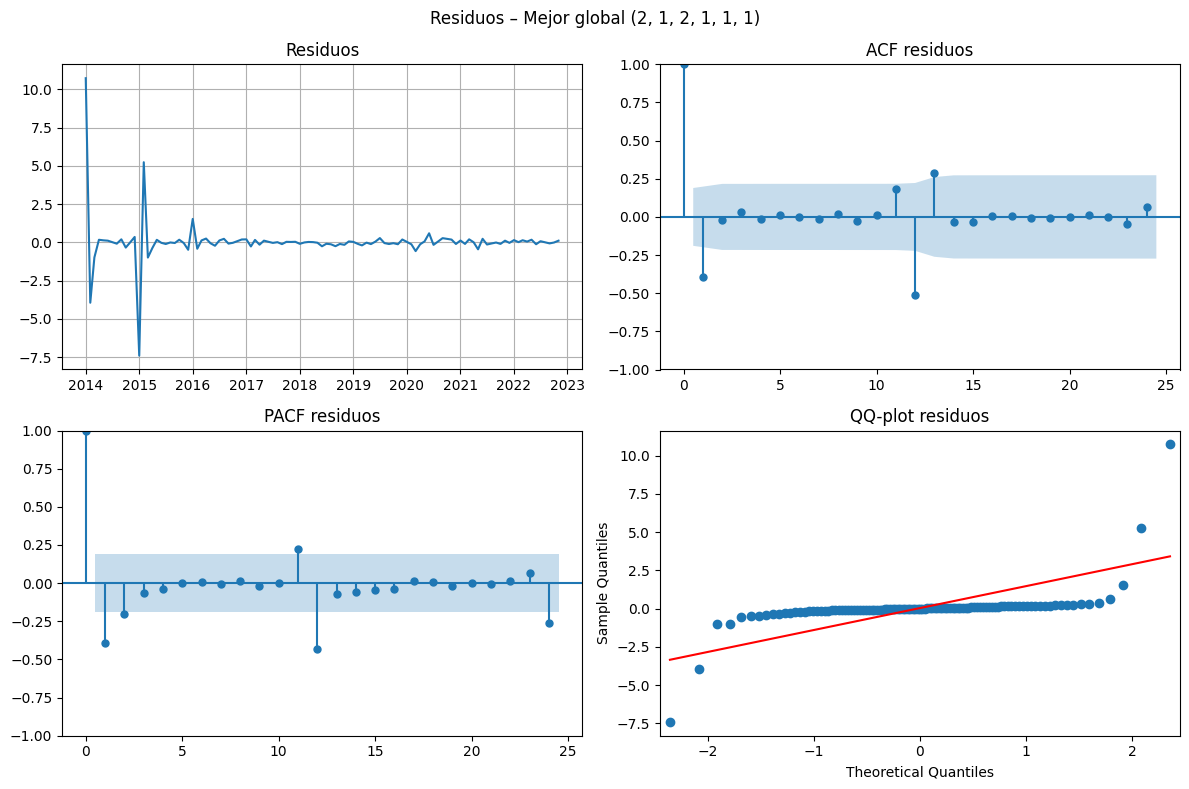

[Ljung–Box p-val] (alto = OK, sin autocorr):
      lb_stat     lb_pvalue
12  53.349971  3.568853e-07
24  65.053403  1.195462e-05

=== Hold-out H=6 meses ===
[ADF] cruda p=0.5500 | diff(1) p=0.2676 | diff(12) p=0.2318 | diff(12)+diff(1) p=0.0000
[Sugerencia] d=1, D=1 (s=12)

[TOP AIC – ampliado]
                   cfg        AIC
0   (2, 1, 3, 1, 1, 1) -30.888239
1   (0, 1, 0, 1, 1, 1) -30.745117
2   (3, 1, 2, 1, 1, 1) -30.539020
3   (1, 1, 0, 1, 1, 1) -30.385270
4   (0, 1, 1, 1, 1, 1) -30.262897
5   (3, 1, 0, 1, 1, 1) -30.248785
6   (1, 1, 3, 1, 1, 1) -29.952635
7   (1, 1, 1, 1, 1, 1) -29.442002
8   (2, 1, 0, 1, 1, 1) -28.896202
9   (2, 1, 3, 0, 1, 1) -28.836949
10  (0, 1, 2, 1, 1, 1) -28.722667
11  (2, 1, 2, 0, 1, 1) -28.697305


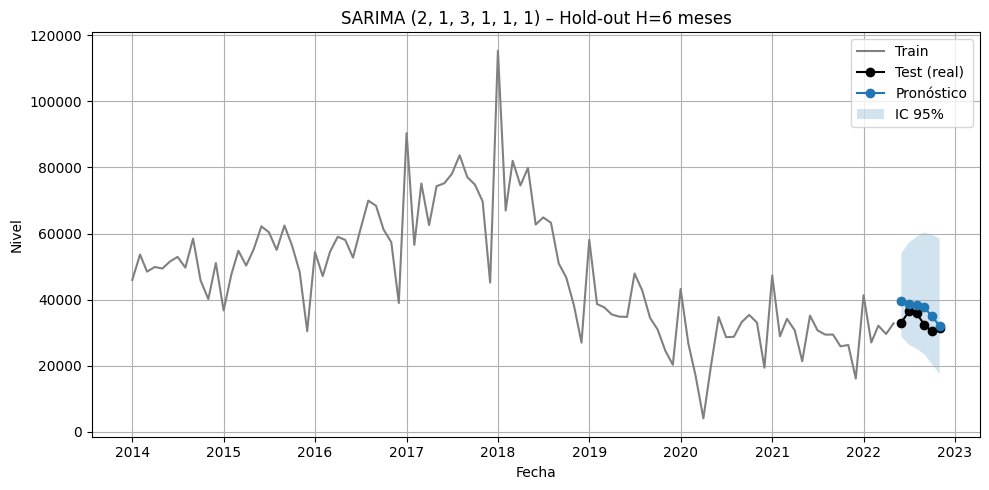

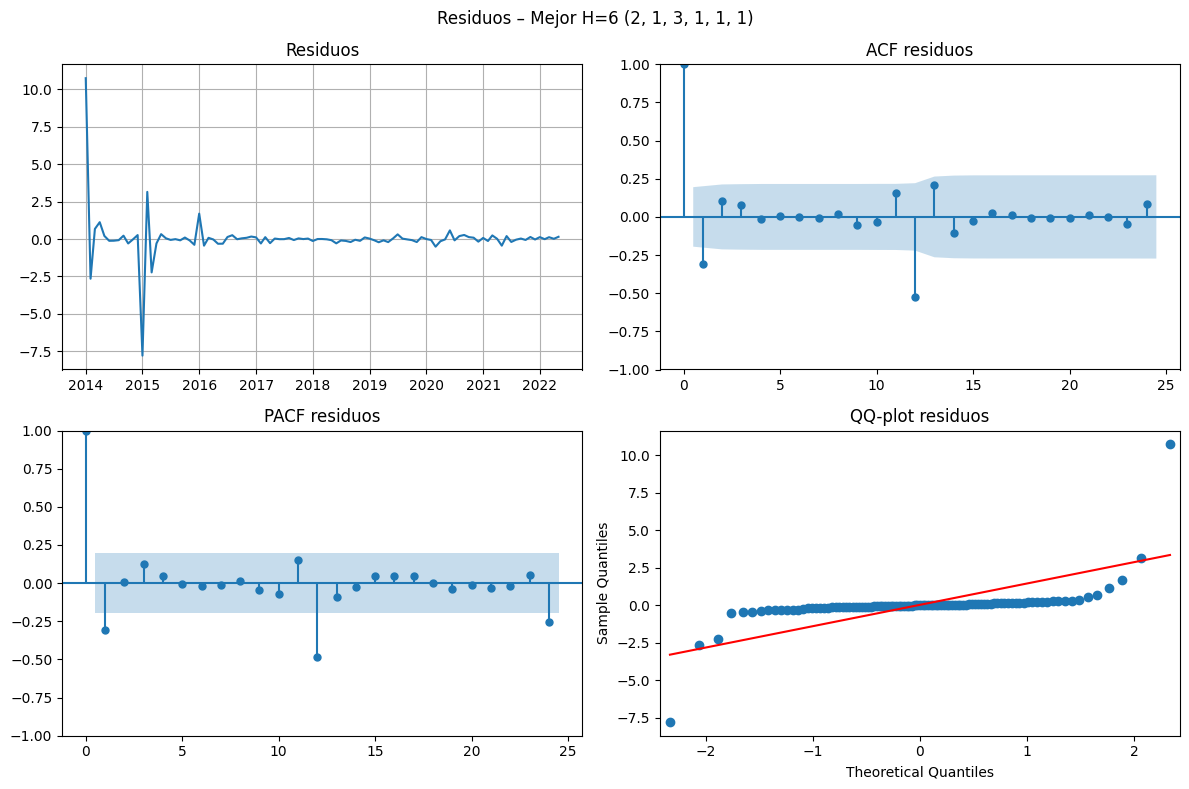

[Ljung–Box p-val] (alto = OK, sin autocorr):
      lb_stat  lb_pvalue
12  47.575977   0.000004
24  55.589972   0.000261

=== Hold-out H=12 meses ===
[ADF] cruda p=0.8038 | diff(1) p=0.2993 | diff(12) p=0.2568 | diff(12)+diff(1) p=0.0000
[Sugerencia] d=1, D=1 (s=12)

[TOP AIC – ampliado]
                   cfg        AIC
0   (2, 1, 3, 0, 1, 1) -27.215831
1   (3, 1, 1, 1, 1, 1) -25.333267
2   (3, 1, 3, 0, 1, 1) -25.237499
3   (3, 1, 0, 1, 1, 1) -24.892534
4   (0, 1, 0, 1, 1, 1) -24.573554
5   (2, 1, 3, 1, 1, 1) -24.412209
6   (0, 1, 1, 1, 1, 1) -24.398821
7   (1, 1, 0, 1, 1, 1) -24.185033
8   (1, 1, 1, 1, 1, 1) -23.779671
9   (0, 1, 1, 0, 1, 1) -23.611995
10  (2, 1, 0, 1, 1, 1) -23.414617
11  (0, 1, 2, 1, 1, 1) -23.202212


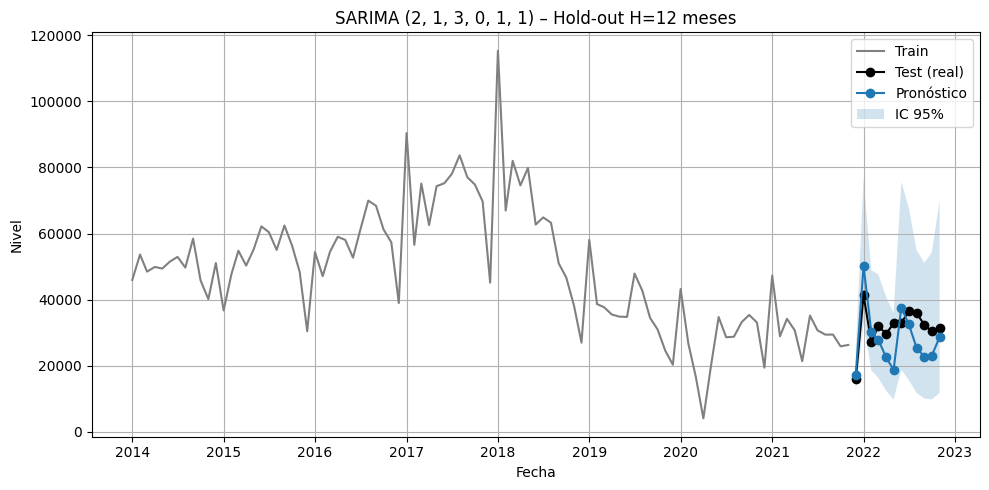

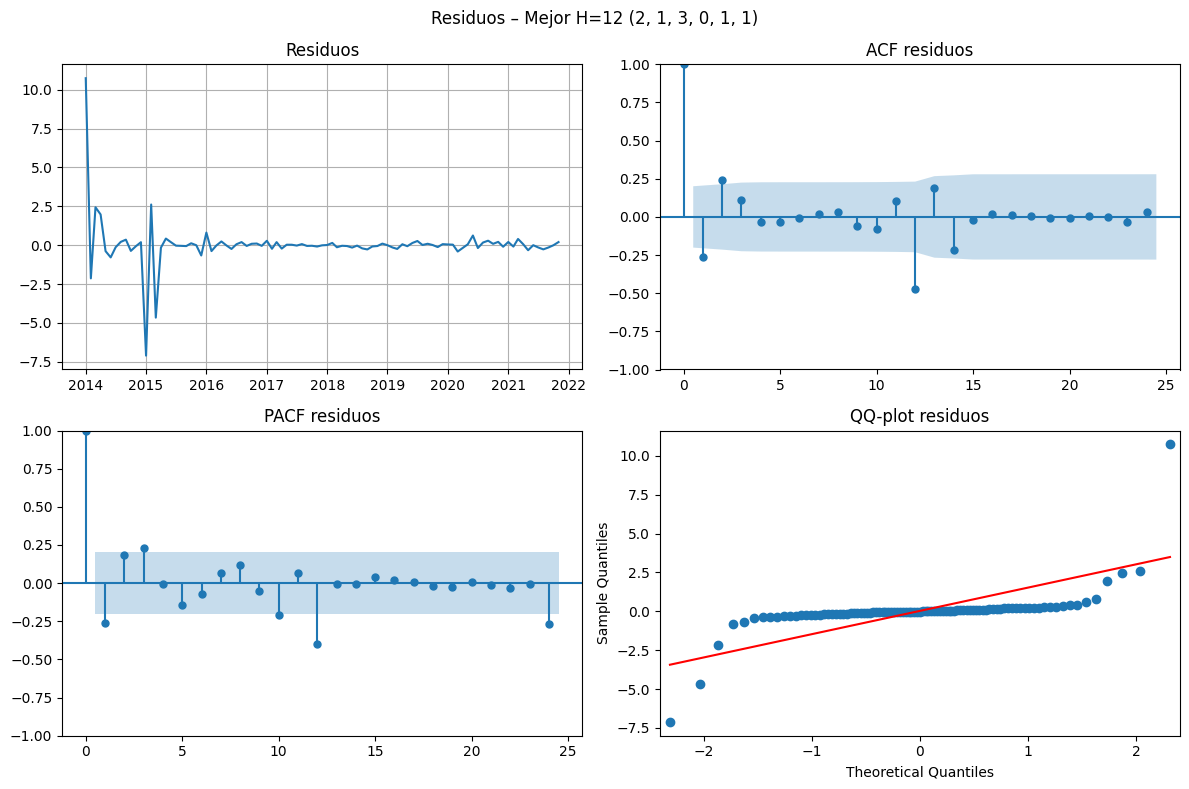

[Ljung–Box p-val] (alto = OK, sin autocorr):
      lb_stat  lb_pvalue
12  40.739912   0.000054
24  50.431027   0.001248

=== HOLD-OUT SARIMA (grilla ampliada) ===
   horizon_m                                 model         RMSE          MAE  \
0          6  SARIMA(2, 1, 3, 1, 1, 1) (AIC=-30.9)  4150.499680  3665.396231   
1         12  SARIMA(2, 1, 3, 0, 1, 1) (AIC=-27.2)  7393.708641  6432.413052   

        MAPE  
0  11.154135  
1  19.724488  


In [20]:
# =========================================================
# SARIMA ampliado: Grid AIC con P,Q ∈ {0,1,2} + Residuos + Hold-out (H=6,12)
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

# ---------- 0) Serie mensual (df_monthly) ----------
if 'df_monthly' not in globals():
    assert 'totales_df' in globals(), "Falta 'df_monthly' o 'totales_df'."
    df_monthly = (
        totales_df[['fecha','patentamientos']]
        .rename(columns={'fecha':'ds','patentamientos':'y'})
        .sort_values('ds')
        .copy()
    )

dfm = df_monthly.copy()
if 'ds' not in dfm.columns:
    dfm = dfm.reset_index().rename(columns={'index':'ds'})
dfm['ds'] = pd.to_datetime(dfm['ds'])
dfm['y']  = pd.to_numeric(dfm['y'], errors='coerce')
dfm = dfm.set_index('ds').asfreq('MS')
if dfm['y'].isna().any():
    dfm['y'] = dfm['y'].interpolate('linear')
y_full = dfm['y'].astype(float)
print(f"[INFO] Serie: {y_full.index.min().date()} → {y_full.index.max().date()} | n={len(y_full)}")

# ---------- 1) Parámetros toggles ----------
USE_CAP = True     # capado p1–p99 SOLO en train
USE_LOG = True     # modelar en log1p (expm1 al volver)
S = 12             # estacionalidad mensual
# Grilla ampliada:
PMAX, QMAX = 3, 3  # p, q (no estacional)
PSEAS_MAX, QSEAS_MAX = 2, 2  # P, Q (estacional)

# ---------- 2) Helpers ----------
def winsorize(s: pd.Series, q_low=0.01, q_high=0.99):
    pL, pH = s.quantile([q_low, q_high])
    return s.clip(pL, pH), float(pL), float(pH)

def metrics(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def choose_d_D(y: pd.Series, s=12):
    def _adf(x):
        x = pd.Series(x).dropna()
        if len(x) < 20: return np.nan
        return adfuller(x, autolag='AIC')[1]  # p-value
    p_raw  = _adf(y)
    p_d1   = _adf(y.diff(1))
    p_s1   = _adf(y.diff(s))
    p_s1d1 = _adf(y.diff(s).diff(1))
    print(f"[ADF] cruda p={p_raw:.4f} | diff(1) p={p_d1:.4f} | diff({s}) p={p_s1:.4f} | diff({s})+diff(1) p={p_s1d1:.4f}")
    D = 1 if (not np.isnan(p_s1)) and (p_s1 > 0.05) else 0
    base = y.diff(s) if D==1 else y
    p_base = _adf(base)
    d = 1 if (not np.isnan(p_base)) and (p_base > 0.05) else 0
    print(f"[Sugerencia] d={d}, D={D} (s={s})")
    return int(d), int(D)

def fit_grid_aic_ext(y_train: pd.Series, d:int, D:int, s:int=12,
                     use_cap=True, use_log=True,
                     pmax=PMAX, qmax=QMAX, Pmax=PSEAS_MAX, Qmax=QSEAS_MAX):
    # Prepara train (cap + log si corresponde)
    y_tr = y_train.copy()
    meta = {}
    if use_cap:
        y_tr, pL, pH = winsorize(y_tr, 0.01, 0.99)
        meta['cap'] = (pL, pH)
    if use_log:
        y_tr = np.log1p(y_tr)
        meta['log1p'] = True
    else:
        meta['log1p'] = False

    best_aic = np.inf; best_cfg=None; best_fit=None
    rows = []
    for p,q in product(range(pmax+1), range(qmax+1)):
        for P,Q in product(range(Pmax+1), range(Qmax+1)):
            try:
                fit = SARIMAX(y_tr,
                              order=(p,d,q),
                              seasonal_order=(P,D,Q,s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
                aic = fit.aic
                rows.append(((p,d,q,P,D,Q), aic))
                if aic < best_aic:
                    best_aic, best_cfg, best_fit = aic, (p,d,q,P,D,Q), fit
            except Exception:
                continue
    aic_table = pd.DataFrame(rows, columns=['cfg','AIC']).sort_values('AIC').reset_index(drop=True)
    print("\n[TOP AIC – ampliado]")
    print(aic_table.head(12))
    return best_fit, best_cfg, float(best_aic), meta, aic_table, y_tr.index  # devolvemos idx de train del modelo

def predict_oos(fit, steps, meta, index_like):
    fc = fit.get_forecast(steps=steps)
    yhat = fc.predicted_mean
    if meta.get('log1p', False):
        yhat = np.expm1(yhat)
    yhat.index = index_like
    ci = fc.conf_int()
    if meta.get('log1p', False):
        try:
            ci = np.expm1(ci)
        except Exception:
            pass
    ci.index = index_like
    return yhat, ci

def residual_diagnostics(fit, train_index, title="Diagnóstico de residuos (mejor global)"):
    # resid en la escala del modelo (log si se usó log1p); usar índice del train
    resid = pd.Series(fit.resid, index=train_index).dropna()
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()
    axes[0].plot(resid); axes[0].set_title('Residuos'); axes[0].grid(True)
    plot_acf(resid, lags=24, ax=axes[1]); axes[1].set_title('ACF residuos')
    plot_pacf(resid, lags=24, ax=axes[2]); axes[2].set_title('PACF residuos')
    qqplot(resid, line='s', ax=axes[3]); axes[3].set_title('QQ-plot residuos')
    plt.suptitle(title); plt.tight_layout(); plt.show()
    lb = acorr_ljungbox(resid, lags=[12,24], return_df=True)
    print("[Ljung–Box p-val] (alto = OK, sin autocorr):")
    print(lb)

# ---------- 3) Fit global con grilla ampliada + diagnóstico ----------
print("\n=== Ajuste global con grilla ampliada ===")
d_all, D_all = choose_d_D(y_full, s=S)
fit_all, cfg_all, aic_all, meta_all, aic_table, train_idx = fit_grid_aic_ext(
    y_full, d=d_all, D=D_all, s=S, use_cap=USE_CAP, use_log=USE_LOG
)
print(f"\n[Mejor global] cfg={cfg_all}, AIC={aic_all:.1f}, meta={meta_all}")
residual_diagnostics(fit_all, train_idx, title=f"Residuos – Mejor global {cfg_all}")

# ---------- 4) Hold-out H = 6 y 12 con grilla ampliada ----------
hold_rows = []
for H in [6, 12]:
    train = y_full.iloc[:-H]
    test  = y_full.iloc[-H:]
    print(f"\n=== Hold-out H={H} meses ===")
    dH, DH = choose_d_D(train, s=S)
    fitH, cfgH, aicH, metaH, aic_tabH, train_idxH = fit_grid_aic_ext(
        train, d=dH, D=DH, s=S, use_cap=USE_CAP, use_log=USE_LOG
    )
    yhat, ci = predict_oos(fitH, H, metaH, test.index)
    rmse, mae, mape = metrics(test.values, yhat.values)
    hold_rows.append({'horizon_m': H, 'model': f"SARIMA{cfgH} (AIC={aicH:.1f})", 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})
    # gráfico
    plt.figure(figsize=(10,5))
    plt.plot(train.index, train.values, label='Train', color='gray')
    plt.plot(test.index,  test.values,  label='Test (real)', color='black', marker='o')
    plt.plot(yhat.index,  yhat.values,  label='Pronóstico', color='tab:blue', marker='o')
    try:
        plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2, label='IC 95%')
    except Exception:
        pass
    plt.title(f"SARIMA {cfgH} – Hold-out H={H} meses")
    plt.xlabel('Fecha'); plt.ylabel('Nivel'); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()
    # diagnóstico rápido de residuos del mejor para este H
    residual_diagnostics(fitH, train_idxH, title=f"Residuos – Mejor H={H} {cfgH}")

hold_df = pd.DataFrame(hold_rows)
print("\n=== HOLD-OUT SARIMA (grilla ampliada) ===")
print(hold_df)


In [21]:
# --- CARGA + FEATURES IPC (robusto para 'IPC (%)') ---

import re
import numpy as np
import pandas as pd

# Si ya tenés ipc_raw cargado, salteá la lectura; si no, ajusta ipc_path:
ipc_path = '/content/drive/MyDrive/AST/ipc_mensual_2014_2022.csv'
ipc_raw = pd.read_csv(ipc_path)

# 1) Detectar columnas de fecha y valor de forma flexible
def detect_col(df_cols, candidates_exact, candidates_contains):
    # match exact (en minúscula)
    lower_map = {c.lower(): c for c in df_cols}
    for key in candidates_exact:
        if key in lower_map:
            return lower_map[key]
    # match por "contiene"
    for c in df_cols:
        lc = c.lower()
        if any(k in lc for k in candidates_contains):
            return c
    raise ValueError(f"No se encontró ninguna columna compatible. Columnas: {list(df_cols)}")

date_col = detect_col(
    ipc_raw.columns,
    candidates_exact={'fecha','ds','date','period','mes'},
    candidates_contains={'fecha','date','period','mes'}
)

val_col = detect_col(
    ipc_raw.columns,
    candidates_exact={'ipc','cpi','indice','índice','index','valor','value','ipc (%)'},
    candidates_contains={'ipc','cpi','indice','índice','index','valor','value','var','%','porcentaje'}
)

# 2) Parseo de fecha y valor
ipc_df = ipc_raw[[date_col, val_col]].copy()
ipc_df.columns = ['ds', 'ipc_raw']
ipc_df['ds'] = pd.to_datetime(ipc_df['ds'], errors='coerce', dayfirst=True)
ipc_df = ipc_df.dropna(subset=['ds']).sort_values('ds').set_index('ds')

# Limpiar texto: quitar %, cambiar coma decimal a punto y convertir a float
ipc_str = (ipc_df['ipc_raw'].astype(str)
           .str.replace('%', '', regex=False)
           .str.replace(',', '.', regex=False)
           .str.strip())
ipc_series = pd.to_numeric(ipc_str, errors='coerce')

# Asegurar frecuencia mensual
ipc_series = ipc_series.asfreq('MS')

# 3) Construir features: si la columna original trae %, asumimos MoM (%)
#    Desde MoM (%), construir YoY (%) como producto compuesto de 12 meses.
colname_lc = val_col.lower()
is_mom = ('%' in colname_lc) or ('var' in colname_lc) or ('mom' in colname_lc)

ipc_feat = pd.DataFrame(index=ipc_series.index)

if is_mom:
    # IPC mensual (%)
    ipc_feat['ipc_mom'] = ipc_series
    # YoY compuesto a partir de MoM
    ipc_feat['ipc_yoy'] = (
        (1 + ipc_feat['ipc_mom']/100.0)
        .rolling(12, min_periods=12)
        .apply(np.prod, raw=True) - 1
    ) * 100
else:
    # Si fuese un índice de nivel: derivar MoM/YoY por cambios porcentuales
    idx = ipc_series
    ipc_feat['ipc_yoy'] = idx.pct_change(12)*100
    ipc_feat['ipc_mom'] = idx.pct_change()*100

# Rezagos útiles (1 y 3 meses)
for k in [1, 3]:
    ipc_feat[f'ipc_yoy_l{k}'] = ipc_feat['ipc_yoy'].shift(k)
    ipc_feat[f'ipc_mom_l{k}'] = ipc_feat['ipc_mom'].shift(k)

# Relleno suave si quedan NaN iniciales (por YoY/rezagos); no rellenes más allá del inicio lógico
ipc_feat = ipc_feat.dropna().copy()

# 4) Alinear con la serie objetivo y armar y_all / X_all
assert 'y_full' in globals(), "Se esperaba y_full (serie mensual de patentamientos). Créala antes."
data = pd.concat([y_full.rename('y'), ipc_feat], axis=1).dropna()
y_all = data['y'].astype(float)
X_all = data.drop(columns=['y']).astype(float)

print(f"[IPC] Features construidas: {list(X_all.columns)}")
print(f"[IPC] Rango usable: {X_all.index.min().date()} → {X_all.index.max().date()} | n={len(X_all)}")


[IPC] Features construidas: ['ipc_mom', 'ipc_yoy', 'ipc_yoy_l1', 'ipc_mom_l1', 'ipc_yoy_l3', 'ipc_mom_l3']
[IPC] Rango usable: NaT → NaT | n=0


[IPC] Features: ['ipc_mom', 'ipc_yoy', 'ipc_yoy_l1', 'ipc_mom_l1', 'ipc_yoy_l3', 'ipc_mom_l3']
[IPC] Rango usable: 2015-03-01 → 2022-11-01 | n=93
[Y]   Rango usable: 2015-03-01 → 2022-11-01 | n=93


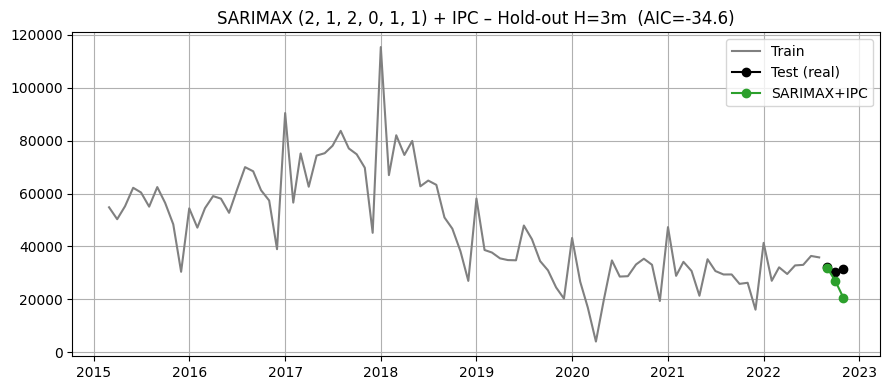

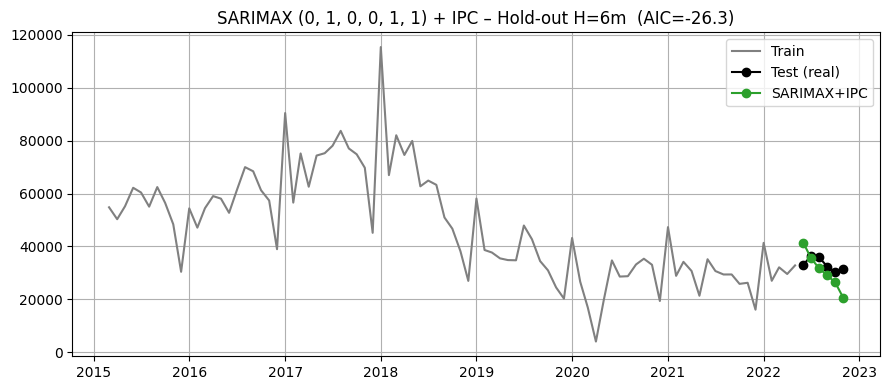

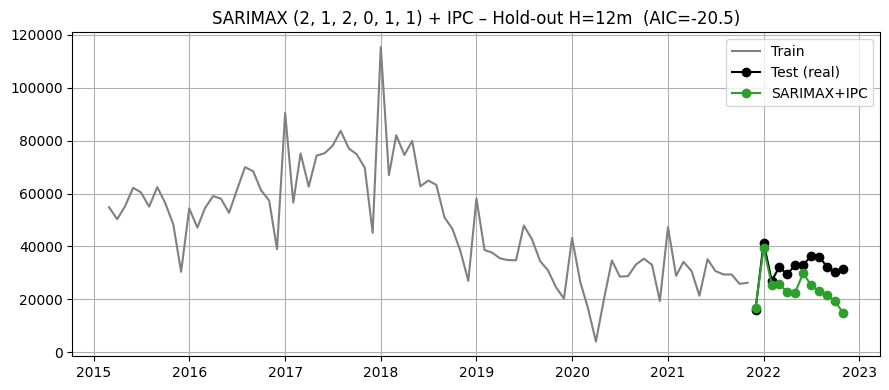


=== HOLD-OUT SARIMAX (con IPC) ===
   horizon_m                            model         RMSE          MAE  \
0          3  SARIMAX(2, 1, 2, 0, 1, 1) + IPC  6451.998083  4836.233493   
1          6  SARIMAX(0, 1, 0, 0, 1, 1) + IPC  6219.407358  5253.125625   
2         12  SARIMAX(2, 1, 2, 0, 1, 1) + IPC  9167.043596  7734.763878   

        MAPE  
0  15.519056  
1  16.194982  
2  23.825493  


In [22]:
# ===========================
# IPC EOM ("Fecha", "IPC (%)") -> Features MS + SARIMAX con exógenas
# ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- 0) Serie objetivo y_full (ya creada antes a MS) ---
assert 'y_full' in globals(), "Falta y_full (serie mensual de patentamientos a 'MS')."

# --- 1) Cargar tu archivo EOM tal cual lo tenés ---
ipc_path = '/content/drive/MyDrive/AST/ipc_mensual_2014_2022.csv'  # ajustá si difiere
ipc_raw = pd.read_csv(ipc_path)

# Columnas exactas según tu captura: "Fecha" y "IPC (%)"
df_ipc = ipc_raw[['Fecha','IPC (%)']].copy()
df_ipc['Fecha'] = pd.to_datetime(df_ipc['Fecha'], errors='coerce', dayfirst=True)

# Limpiar valor: quitar % y cambiar coma por punto, convertir a float
v = (df_ipc['IPC (%)'].astype(str)
                    .str.replace('%','', regex=False)
                    .str.replace(',','.', regex=False)
                    .str.strip())
df_ipc['ipc_mom_raw'] = pd.to_numeric(v, errors='coerce')  # variación mensual en %

# --- 2) Agregar por mes calendario y pasar a inicio de mes (MS) ---
# tomamos el ÚLTIMO valor del mes (fin de mes) y lo situamos en el mes correspondiente (MS)
ipc_month = (df_ipc.dropna(subset=['Fecha'])
                     .groupby(df_ipc['Fecha'].dt.to_period('M'))['ipc_mom_raw']
                     .last())
ipc_month.index = ipc_month.index.to_timestamp(how='start')  # -> 'MS'
ipc_month = ipc_month.asfreq('MS')

# --- 3) Features: MoM y YoY compuesto a partir de MoM ---
ipc_feat = pd.DataFrame(index=ipc_month.index)
ipc_feat['ipc_mom'] = ipc_month  # %
ipc_feat['ipc_yoy'] = (
    (1 + ipc_feat['ipc_mom']/100.0)
    .rolling(12, min_periods=12)
    .apply(np.prod, raw=True) - 1
) * 100

# Rezagos 1 y 3
for k in [1,3]:
    ipc_feat[f'ipc_yoy_l{k}'] = ipc_feat['ipc_yoy'].shift(k)
    ipc_feat[f'ipc_mom_l{k}'] = ipc_feat['ipc_mom'].shift(k)

# --- 4) Alinear con y_full y dejar dataset final (quita NaN iniciales por rolling/lag) ---
common_idx = y_full.index.intersection(ipc_feat.index)
ipc_feat = ipc_feat.loc[common_idx].dropna()
y_all    = y_full.loc[ipc_feat.index].astype(float)
X_all    = ipc_feat.astype(float)

print(f"[IPC] Features: {list(X_all.columns)}")
print(f"[IPC] Rango usable: {X_all.index.min().date()} → {X_all.index.max().date()} | n={len(X_all)}")
print(f"[Y]   Rango usable: {y_all.index.min().date()} → {y_all.index.max().date()} | n={len(y_all)}")

# --- 5) Helpers para SARIMAX con exógenas ---
S = 12

def metrics(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    mape = float(np.mean(np.abs((y_true - y_pred) / y_true))*100)
    return rmse, mae, mape

def winsorize(s: pd.Series, q_low=0.01, q_high=0.99):
    pL, pH = s.quantile([q_low, q_high])
    return s.clip(pL, pH)

def choose_d_D(y: pd.Series, s=12):
    def _p(x):
        x = pd.Series(x).dropna()
        if len(x) < 20: return 1.0
        return adfuller(x, autolag='AIC')[1]
    D = 1 if _p(y.diff(s)) > 0.05 else 0
    base = y.diff(s) if D==1 else y
    d = 1 if _p(base) > 0.05 else 0
    return int(d), int(D)

def fit_sarimax_grid(y_tr: pd.Series, X_tr: pd.DataFrame, d:int, D:int,
                     pmax=2, qmax=2, Pmax=1, Qmax=1, use_cap=True, use_log=True):
    y_cap = winsorize(y_tr, 0.01, 0.99) if use_cap else y_tr.copy()
    y_mod = np.log1p(y_cap) if use_log else y_cap

    scaler = StandardScaler()
    Xs_tr = pd.DataFrame(scaler.fit_transform(X_tr), index=X_tr.index, columns=X_tr.columns)

    best_aic = np.inf; best_cfg=None; best_fit=None
    for p,q in product(range(pmax+1), range(qmax+1)):
        for P,Q in product(range(Pmax+1), range(Qmax+1)):
            try:
                fit = SARIMAX(y_mod, exog=Xs_tr,
                              order=(p,d,q), seasonal_order=(P,D,Q,S),
                              enforce_stationarity=False, enforce_invertibility=False
                             ).fit(disp=False)
                if fit.aic < best_aic:
                    best_aic, best_cfg, best_fit = fit.aic, (p,d,q,P,D,Q), fit
            except Exception:
                pass
    return best_fit, best_cfg, best_aic, scaler, use_log

def forecast_sarimax(fit, scaler, use_log, X_te: pd.DataFrame, idx):
    Xs_te = pd.DataFrame(scaler.transform(X_te), index=X_te.index, columns=X_te.columns)
    fc = fit.get_forecast(steps=len(X_te), exog=Xs_te).predicted_mean
    yhat = np.expm1(fc) if use_log else fc
    yhat.index = idx
    return yhat

# --- 6) HOLD-OUT H={3,6,12} con exógenas ---
rows = []
for H in [3,6,12]:
    train = y_all.iloc[:-H];  test = y_all.iloc[-H:]
    X_tr  = X_all.loc[train.index]; X_te = X_all.loc[test.index]

    d, D = choose_d_D(train, s=S)
    fit, cfg, aic, scaler, use_log = fit_sarimax_grid(train, X_tr, d, D,
                                                      pmax=2, qmax=2, Pmax=1, Qmax=1,
                                                      use_cap=True, use_log=True)
    yhat = forecast_sarimax(fit, scaler, use_log, X_te, test.index)
    rmse, mae, mape = metrics(test.values, yhat.values)
    rows.append({'horizon_m': H, 'model': f"SARIMAX{cfg} + IPC", 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})

    plt.figure(figsize=(9,4))
    plt.plot(train.index, train.values, label='Train', color='gray')
    plt.plot(test.index,  test.values,  label='Test (real)', color='black', marker='o')
    plt.plot(yhat.index,  yhat.values,  label='SARIMAX+IPC', color='tab:green', marker='o')
    plt.title(f"SARIMAX {cfg} + IPC – Hold-out H={H}m  (AIC={aic:.1f})")
    plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

hold = pd.DataFrame(rows)
print("\n=== HOLD-OUT SARIMAX (con IPC) ===")
print(hold)


In [25]:
# ==========================================================
# GRID RÁPIDO (acotado) – SARIMA vs SARIMAX(IPC)
# Usa variables ya en memoria: y_full, y_all, X_all
# CV LITE: H=6 (3 cutoffs) + Hold-out: H=6 y H=12
# Grilla: p,q<=2; P,Q<=1 (rápido). Ajustable.
# ==========================================================
import numpy as np, pandas as pd
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings; warnings.filterwarnings("ignore")

# --------- Ajustá estos nombres si hiciera falta ---------
assert 'y_full' in globals(), "Definí y_full (serie mensual MS)."
assert 'y_all'  in globals() and 'X_all' in globals(), "Definí y_all y X_all (alineadas)."

# Baseline SARIMA debe comparar en exactamente el mismo rango temporal que SARIMAX:
idx_common = y_all.index
y_use = y_full.loc[idx_common].astype(float)
X_all = X_all.loc[idx_common].astype(float)

# Filtramos set de features según disponibilidad (no metemos todo para evitar colinealidad)
candidate_sets = [
    ['ipc_yoy_l1'],
    ['ipc_yoy_l1','ipc_mom_l1']
]
feature_sets = []
for s in candidate_sets:
    s2 = [c for c in s if c in X_all.columns]
    if len(s2) >= 1:
        feature_sets.append(s2)
if not feature_sets:
    raise ValueError("No encuentro columnas esperadas en X_all. Necesito al menos 'ipc_yoy_l1' o 'ipc_mom_l1'.")

S = 12  # estacionalidad mensual

def winsorize(s, q_low=0.01, q_high=0.99):
    pL, pH = s.quantile([q_low, q_high]); return s.clip(pL, pH)

def metrics(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def choose_d_D(y, s=12):
    def _p(x):
        x = pd.Series(x).dropna()
        if len(x) < 20: return 1.0
        return adfuller(x, autolag='AIC')[1]
    D = 1 if _p(y.diff(s)) > 0.05 else 0
    base = y.diff(s) if D==1 else y
    d = 1 if _p(base) > 0.05 else 0
    return int(d), int(D)

def fit_best_sarima(y_tr, pmax=2, qmax=2, Pmax=1, Qmax=1, use_cap=True, use_log=True):
    y_cap = winsorize(y_tr, 0.01, 0.99) if use_cap else y_tr
    y_mod = np.log1p(y_cap) if use_log else y_cap
    d,D = choose_d_D(y_tr, S)
    best = (np.inf, None, None, use_log)  # AIC, cfg, fit, use_log
    for p,q in product(range(pmax+1), range(qmax+1)):
        for P,Q in product(range(Pmax+1), range(Qmax+1)):
            try:
                fit = SARIMAX(y_mod, order=(p,d,q), seasonal_order=(P,D,Q,S),
                              enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                if fit.aic < best[0]:
                    best = (fit.aic, (p,d,q,P,D,Q), fit, use_log)
            except Exception:
                pass
    return best  # AIC, cfg, fit, use_log

def fit_best_sarimax(y_tr, X_tr, pmax=2, qmax=2, Pmax=1, Qmax=1, use_cap=True, use_log=True):
    y_cap = winsorize(y_tr, 0.01, 0.99) if use_cap else y_tr
    y_mod = np.log1p(y_cap) if use_log else y_cap
    scaler = StandardScaler()
    Xs_tr = pd.DataFrame(scaler.fit_transform(X_tr), index=X_tr.index, columns=X_tr.columns)
    d,D = choose_d_D(y_tr, S)
    best = (np.inf, None, None, scaler, use_log)
    for p,q in product(range(pmax+1), range(qmax+1)):
        for P,Q in product(range(Pmax+1), range(Qmax+1)):
            try:
                fit = SARIMAX(y_mod, exog=Xs_tr, order=(p,d,q), seasonal_order=(P,D,Q,S),
                              enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                if fit.aic < best[0]:
                    best = (fit.aic, (p,d,q,P,D,Q), fit, scaler, use_log)
            except Exception:
                pass
    return best  # AIC, cfg, fit, scaler, use_log

def forecast_fit(fit, idx, use_log, scaler=None, X_te=None):
    if X_te is not None:
        Xs_te = pd.DataFrame(scaler.transform(X_te), index=X_te.index, columns=X_te.columns)
        pred = fit.get_forecast(steps=len(X_te), exog=Xs_te).predicted_mean
    else:
        pred = fit.get_forecast(steps=len(idx)).predicted_mean
    yhat = np.expm1(pred) if use_log else pred
    yhat.index = idx
    return yhat

# -----------------------------
# CV LITE: H=6 con 3 cutoffs
# -----------------------------
def build_cutoffs(y_idx, X_idx, H=6, period_months=3, max_cutoffs=3):
    start = max(y_idx.min(), X_idx.min()) + pd.DateOffset(years=3)
    last  = min(y_idx.max(), X_idx.max())
    cuts = []
    t = start
    while t + pd.DateOffset(months=H) <= last:
        cuts.append(t)
        t += pd.DateOffset(months=period_months)
    return cuts[-max_cutoffs:]

H_cv = 6
cutoffs = build_cutoffs(y_use.index, X_all.index, H=H_cv, period_months=3, max_cutoffs=3)
cv_rows = []

for feats in feature_sets:
    # Subconjunto disponible
    Xsub = X_all[feats].dropna()
    idx  = y_use.index.intersection(Xsub.index)
    y0   = y_use.loc[idx]
    X0   = Xsub.loc[idx]
    if len(y0) < 36 + H_cv:
        continue

    rows = []
    for co in cutoffs:
        train_idx = y0.index[y0.index <= co]
        test_idx  = pd.date_range(co + pd.DateOffset(months=1), co + pd.DateOffset(months=H_cv), freq='MS')
        if not set(test_idx).issubset(set(y0.index)):
            continue
        y_tr, y_te = y0.loc[train_idx], y0.loc[test_idx]
        X_tr, X_te = X0.loc[train_idx], X0.loc[test_idx]

        # SARIMA baseline (mismo rango)
        AICa, cfga, fita, use_log_a = fit_best_sarima(y_tr, pmax=2, qmax=2, Pmax=1, Qmax=1)
        yhat_a = forecast_fit(fita, y_te.index, use_log_a)
        rmse_a, mae_a, mape_a = metrics(y_te.values, yhat_a.values)
        rows.append(['SARIMA', tuple(), AICa, rmse_a, mae_a, mape_a])

        # SARIMAX con ese set
        AICx, cfgx, fitx, scalerx, use_log_x = fit_best_sarimax(y_tr, X_tr, pmax=2, qmax=2, Pmax=1, Qmax=1)
        yhat_x = forecast_fit(fitx, y_te.index, use_log_x, scaler=scalerx, X_te=X_te)
        rmse_x, mae_x, mape_x = metrics(y_te.values, yhat_x.values)
        rows.append([f"SARIMAX+{'+'.join(feats)}", cfgx, AICx, rmse_x, mae_x, mape_x])

    dfc = pd.DataFrame(rows, columns=['model','cfg','AIC','RMSE','MAE','MAPE'])
    if not dfc.empty:
        agg = dfc.groupby('model')[['RMSE','MAE','MAPE']].mean().reset_index()
        agg = agg.assign(features='+'.join(feats))
        cv_rows.append(agg)

cv_summary = (pd.concat(cv_rows, ignore_index=True)
              if cv_rows else pd.DataFrame(columns=['model','RMSE','MAE','MAPE','features']))

print("\n=== CV LITE H=6 (promedios por modelo y set) ===")
print(cv_summary.sort_values(['MAPE','RMSE']).reset_index(drop=True))

# Elegimos el mejor modelo por MAPE en CV (entre SARIMA y los SARIMAX probados)
if not cv_summary.empty:
    best_row = cv_summary.sort_values('MAPE').iloc[0]
    best_is_sarima = (best_row['model'] == 'SARIMA')
    best_feats = [] if best_is_sarima else best_row['features'].split('+')
else:
    # fallback seguro
    best_is_sarima = True
    best_feats = []

print(f"\n[SELECCIÓN] Mejor en CV: {'SARIMA' if best_is_sarima else 'SARIMAX con ' + str(best_feats)}")

# -----------------------------
# HOLD-OUT final: H=6 y H=12
# -----------------------------
def holdout_eval(y, X, feats, H):
    y0 = y.copy()
    if feats:
        X0 = X[feats].loc[y0.index].dropna()
        idx = y0.index.intersection(X0.index)
        y0 = y0.loc[idx]; X0 = X0.loc[idx]
    else:
        X0 = None

    y_tr, y_te = y0.iloc[:-H], y0.iloc[-H:]
    if feats:
        AIC, cfg, fit, scaler, use_log = fit_best_sarimax(y_tr, X0.loc[y_tr.index],
                                                          pmax=2, qmax=2, Pmax=1, Qmax=1)
        yhat = forecast_fit(fit, y_te.index, use_log, scaler=scaler, X_te=X0.loc[y_te.index])
        model_name = f"SARIMAX{cfg} + {feats}"
    else:
        AIC, cfg, fit, use_log = fit_best_sarima(y_tr, pmax=2, qmax=2, Pmax=1, Qmax=1)
        yhat = forecast_fit(fit, y_te.index, use_log)
        model_name = f"SARIMA{cfg}"
    rmse, mae, mape = metrics(y_te.values, yhat.values)
    return {'H': H, 'model': model_name, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

ho_rows = []
for H in [6,12]:
    if best_is_sarima:
        ho_rows.append(holdout_eval(y_use, X_all, [], H))
    else:
        ho_rows.append(holdout_eval(y_use, X_all, best_feats, H))

holdout_df = pd.DataFrame(ho_rows)
print("\n=== HOLD-OUT FINAL (ganador CV) ===")
print(holdout_df)



=== CV LITE H=6 (promedios por modelo y set) ===
                           model         RMSE          MAE       MAPE  \
0  SARIMAX+ipc_yoy_l1+ipc_mom_l1  4778.379925  4126.078200  12.751485   
1                         SARIMA  6513.625594  5742.797166  17.750566   
2                         SARIMA  6513.625594  5742.797166  17.750566   
3             SARIMAX+ipc_yoy_l1  6668.720634  5871.908494  18.122199   

                features  
0  ipc_yoy_l1+ipc_mom_l1  
1             ipc_yoy_l1  
2  ipc_yoy_l1+ipc_mom_l1  
3             ipc_yoy_l1  

[SELECCIÓN] Mejor en CV: SARIMAX con ['ipc_yoy_l1', 'ipc_mom_l1']

=== HOLD-OUT FINAL (ganador CV) ===
    H                                              model         RMSE  \
0   6  SARIMAX(2, 1, 2, 0, 1, 1) + ['ipc_yoy_l1', 'ip...  6218.686213   
1  12  SARIMAX(2, 1, 0, 0, 1, 1) + ['ipc_yoy_l1', 'ip...  8609.808983   

           MAE       MAPE  
0  5414.560115  16.814119  
1  7329.682380  22.882524  


In [26]:
# ==========================================================
# Comparación "manzana con manzana": SARIMA vs SARIMAX(IPC)
# - Usa y_full y X_all ya cargados en memoria
# - Hold-out en H=6 y H=12
# - Misma ventana temporal para ambos modelos
# - Grilla reducida (p,q<=2; P,Q<=1) para que termine rápido
# ==========================================================
import numpy as np, pandas as pd
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings; warnings.filterwarnings("ignore")

# -----------------------------
# 0) Chequeos y recortes
# -----------------------------
assert 'y_full' in globals(), "Falta y_full (serie mensual MS)."
assert 'X_all'  in globals(), "Falta X_all (features IPC)."

# Alinear rangos: misma ventana para ambos modelos
idx_common = y_full.index.intersection(X_all.index)
y_use = y_full.loc[idx_common].astype(float)
X_use = X_all.loc[idx_common].astype(float)

# Elegimos set de features preferido; caemos a alternativas si faltan columnas
preferred = ['ipc_yoy_l1','ipc_mom_l1']
fallbacks = [['ipc_yoy_l1'], ['ipc_mom_l1']]
feat = [c for c in preferred if c in X_use.columns]
if not feat:
    for cand in fallbacks:
        cand2 = [c for c in cand if c in X_use.columns]
        if cand2:
            feat = cand2
            break
if not feat:
    raise ValueError("No encuentro columnas esperadas en X_all (necesito 'ipc_yoy_l1' y/o 'ipc_mom_l1').")

print(f"[INFO] Rango usado: {y_use.index.min().date()} → {y_use.index.max().date()} | n={len(y_use)}")
print(f"[INFO] Features exógenas usadas: {feat}")

# -----------------------------
# 1) Helpers
# -----------------------------
S = 12  # estacionalidad mensual

def winsorize(s: pd.Series, q_low=0.01, q_high=0.99):
    pL, pH = s.quantile([q_low, q_high]); return s.clip(pL, pH)

def metrics(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def choose_d_D(y: pd.Series, s=12):
    def _p(x):
        x = pd.Series(x).dropna()
        if len(x) < 20: return 1.0
        return adfuller(x, autolag='AIC')[1]
    D = 1 if _p(y.diff(s)) > 0.05 else 0
    base = y.diff(s) if D==1 else y
    d = 1 if _p(base) > 0.05 else 0
    return int(d), int(D)

def fit_best_sarima(y_tr, pmax=2, qmax=2, Pmax=1, Qmax=1, use_cap=True, use_log=True):
    y_cap = winsorize(y_tr, 0.01, 0.99) if use_cap else y_tr
    y_mod = np.log1p(y_cap) if use_log else y_cap
    d,D = choose_d_D(y_tr, S)
    best = (np.inf, None, None, use_log)  # AIC, cfg, fit, use_log
    for p,q in product(range(pmax+1), range(qmax+1)):
        for P,Q in product(range(Pmax+1), range(Qmax+1)):
            try:
                fit = SARIMAX(y_mod, order=(p,d,q), seasonal_order=(P,D,Q,S),
                              enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                if fit.aic < best[0]:
                    best = (fit.aic, (p,d,q,P,D,Q), fit, use_log)
            except Exception:
                pass
    return best  # AIC, cfg, fit, use_log

def fit_best_sarimax(y_tr, X_tr, pmax=2, qmax=2, Pmax=1, Qmax=1, use_cap=True, use_log=True):
    y_cap = winsorize(y_tr, 0.01, 0.99) if use_cap else y_tr
    y_mod = np.log1p(y_cap) if use_log else y_cap
    scaler = StandardScaler()
    Xs_tr = pd.DataFrame(scaler.fit_transform(X_tr), index=X_tr.index, columns=X_tr.columns)
    d,D = choose_d_D(y_tr, S)
    best = (np.inf, None, None, scaler, use_log)
    for p,q in product(range(pmax+1), range(qmax+1)):
        for P,Q in product(range(Pmax+1), range(Qmax+1)):
            try:
                fit = SARIMAX(y_mod, exog=Xs_tr, order=(p,d,q), seasonal_order=(P,D,Q,S),
                              enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                if fit.aic < best[0]:
                    best = (fit.aic, (p,d,q,P,D,Q), fit, scaler, use_log)
            except Exception:
                pass
    return best  # AIC, cfg, fit, scaler, use_log

def forecast_fit(fit, idx, use_log, scaler=None, X_te=None):
    if X_te is not None:
        Xs_te = pd.DataFrame(scaler.transform(X_te), index=X_te.index, columns=X_te.columns)
        pred = fit.get_forecast(steps=len(X_te), exog=Xs_te).predicted_mean
    else:
        pred = fit.get_forecast(steps=len(idx)).predicted_mean
    yhat = np.expm1(pred) if use_log else pred
    yhat.index = idx
    return yhat

def holdout_eval(y, X, feats, H, pmax=2, qmax=2, Pmax=1, Qmax=1):
    # Prepara splits
    y_tr, y_te = y.iloc[:-H], y.iloc[-H:]
    if feats:
        X_tr = X[feats].loc[y_tr.index]
        X_te = X[feats].loc[y_te.index]
        AIC, cfg, fit, scaler, use_log = fit_best_sarimax(y_tr, X_tr, pmax, qmax, Pmax, Qmax)
        yhat = forecast_fit(fit, y_te.index, use_log, scaler=scaler, X_te=X_te)
        model_name = f"SARIMAX{cfg} + {feats}"
    else:
        AIC, cfg, fit, use_log = fit_best_sarima(y_tr, pmax, qmax, Pmax, Qmax)
        yhat = forecast_fit(fit, y_te.index, use_log)
        model_name = f"SARIMA{cfg}"
    rmse, mae, mape = metrics(y_te.values, yhat.values)
    return {'H': H, 'model': model_name, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'AIC': AIC}

# -----------------------------
# 2) Hold-out en H=6 y H=12
# -----------------------------
rows = []
for H in [6, 12]:
    # Baseline SARIMA (sin exógenas), MISMO RANGO
    rows.append(holdout_eval(y_use, X_use, [], H, pmax=2, qmax=2, Pmax=1, Qmax=1))
    # SARIMAX con IPC (feat seleccionado)
    rows.append(holdout_eval(y_use, X_use, feat, H, pmax=2, qmax=2, Pmax=1, Qmax=1))

res = pd.DataFrame(rows).sort_values(['H','MAPE']).reset_index(drop=True)
print("\n=== COMPARACIÓN MANZANA CON MANZANA (Hold-out final) ===")
print(res[['H','model','AIC','RMSE','MAE','MAPE']])


[INFO] Rango usado: 2015-03-01 → 2022-11-01 | n=93
[INFO] Features exógenas usadas: ['ipc_yoy_l1', 'ipc_mom_l1']

=== COMPARACIÓN MANZANA CON MANZANA (Hold-out final) ===
    H                                              model        AIC  \
0   6                           SARIMA(0, 1, 0, 0, 1, 1) -27.166247   
1   6  SARIMAX(2, 1, 2, 0, 1, 1) + ['ipc_yoy_l1', 'ip... -25.528921   
2  12                           SARIMA(2, 1, 2, 0, 1, 0) -20.138369   
3  12  SARIMAX(2, 1, 0, 0, 1, 1) + ['ipc_yoy_l1', 'ip... -17.395258   

          RMSE          MAE       MAPE  
0  5310.778403  4910.001811  14.865393  
1  6218.686213  5414.560115  16.814119  
2  6994.267393  5905.505854  18.019004  
3  8609.808983  7329.682380  22.882524  


[INFO] Serie para XGB: 2014-01-01 → 2022-11-01 | n=107 | exog=False

=== XGB HOLD-OUT ===
H=6  -> RMSE=3,405.7 | MAE=2,949.2 | MAPE=8.60%
H=12 -> RMSE=5,041.9 | MAE=4,350.1 | MAPE=14.42%

=== Naive estacional (mismo rango) ===
H=6  -> RMSE=4,718.7 | MAE=4,472.2 | MAPE=13.38%
H=12 -> RMSE=5,167.1 | MAE=4,384.2 | MAPE=13.93%


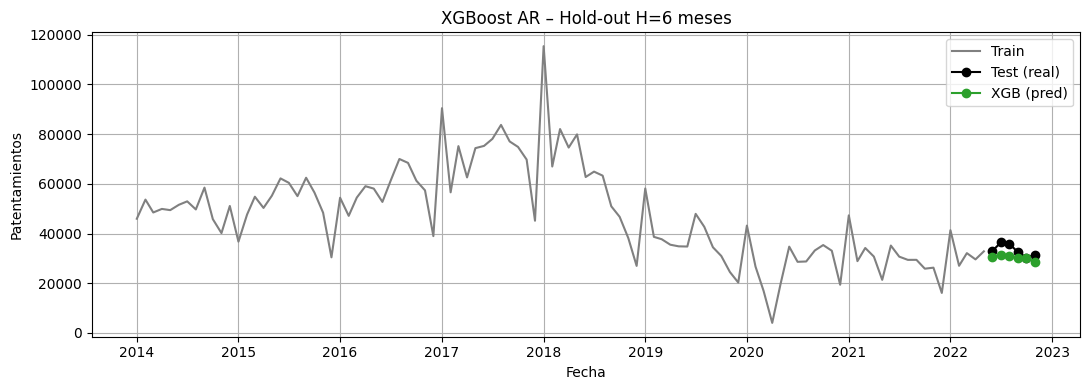

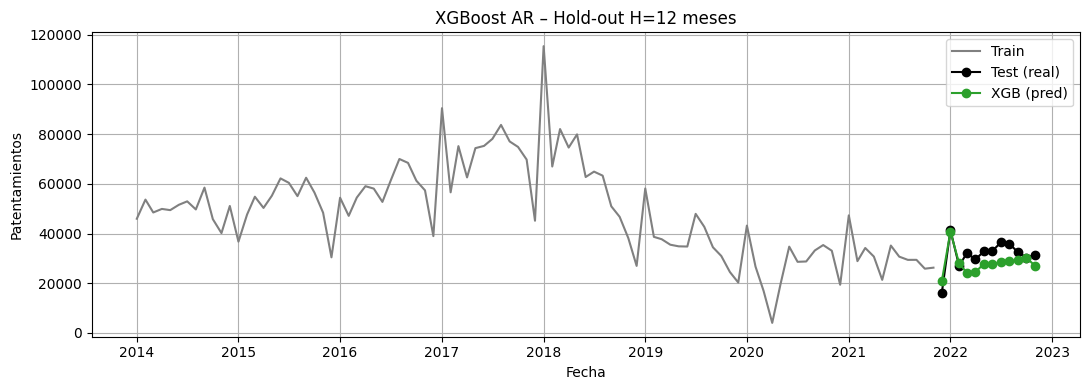

In [28]:
# ==========================================================
# XGBoost Autoregresivo (AR XGB) – SIN early_stopping
# Requiere: y_full (serie mensual con índice 'MS')
# Opcional: X_all (exógenas) -> desactivado por defecto
# ==========================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, warnings
warnings.filterwarnings("ignore")

assert 'y_full' in globals(), "Falta y_full (serie mensual con índice 'MS')."
y = y_full.astype(float).copy()
S = 12  # estacionalidad mensual

# ¿Usar exógenas? (opcional)
USE_EXOG = False
EXOG_COLS = ['ipc_yoy_l1','ipc_mom_l1']  # se usan solo si USE_EXOG=True y existen

try:
    from xgboost import XGBRegressor
except Exception:
    # Colab: instalar si hace falta
    !pip -q install xgboost
    from xgboost import XGBRegressor

# ----------------- Helpers -----------------
def seasonal_naive(y_true: pd.Series):
    return y_true.shift(S)

def metrics(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    rmse = float(np.sqrt(np.mean((y_true - y_pred)**2)))
    mae  = float(np.mean(np.abs(y_true - y_pred)))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def make_train_matrix(series: pd.Series, max_lag=12):
    df = pd.DataFrame(index=series.index)
    for k in [1,2,3,12]:
        if k <= max_lag:
            df[f'lag{k}'] = series.shift(k)
    df['ma3'] = series.shift(1).rolling(3).mean()
    df['ma6'] = series.shift(1).rolling(6).mean()
    df['month'] = series.index.month.astype(int)
    df['month_sin'] = np.sin(2*np.pi*df['month']/12)
    df['month_cos'] = np.cos(2*np.pi*df['month']/12)
    df['y'] = series.values
    df = df.dropna()
    return df.drop(columns=['y']), df['y']

def make_one_row_features(history: pd.Series, next_ts: pd.Timestamp):
    row = {}
    row['lag1']  = history.iloc[-1]
    row['lag2']  = history.iloc[-2] if len(history)>=2 else history.iloc[-1]
    row['lag3']  = history.iloc[-3] if len(history)>=3 else history.iloc[-1]
    row['lag12'] = history.iloc[-12] if len(history)>=12 else history.iloc[-1]
    row['ma3'] = history.iloc[-3:].mean() if len(history)>=3 else history.mean()
    row['ma6'] = history.iloc[-6:].mean() if len(history)>=6 else history.mean()
    m = next_ts.month
    row['month'] = m
    row['month_sin'] = np.sin(2*np.pi*m/12)
    row['month_cos'] = np.cos(2*np.pi*m/12)
    return pd.DataFrame([row], index=[next_ts])

def xgb_model():
    # Config estable para muestra corta y sin early stopping
    return XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror'
    )

def add_exog_train(X_tr: pd.DataFrame, X_all: pd.DataFrame):
    use_cols = [c for c in EXOG_COLS if c in X_all.columns]
    if not use_cols:
        return X_tr, []
    Z = X_all[use_cols].reindex(X_tr.index)
    return pd.concat([X_tr, Z], axis=1), use_cols

def add_exog_row(next_ts: pd.Timestamp, X_all: pd.DataFrame, use_cols: list):
    if not use_cols:
        return None
    z = X_all.loc[[next_ts], use_cols]
    return z if not z.isnull().any().any() else None

def recursive_forecast_xgb(y_series: pd.Series, H: int, use_exog=False, X_all=None):
    cutoff = y_series.index.max() - pd.DateOffset(months=H)
    y_tr = y_series.loc[:cutoff]
    y_te = y_series.loc[cutoff+pd.DateOffset(months=1):]

    X_tr0, y_tr0 = make_train_matrix(y_tr, max_lag=12)

    if USE_EXOG and use_exog and X_all is not None:
        X_tr, used_cols = add_exog_train(X_tr0, X_all)
    else:
        X_tr, used_cols = X_tr0, []

    model = xgb_model()
    model.fit(X_tr, y_tr0, verbose=False)

    history = y_tr.copy()
    preds = []
    next_dates = pd.date_range(history.index.max() + pd.offsets.MonthBegin(), periods=H, freq='MS')

    for ts in next_dates:
        x_row = make_one_row_features(history, ts)
        if used_cols:
            z_row = add_exog_row(ts, X_all, used_cols)
            xr = pd.concat([x_row, z_row], axis=1) if z_row is not None else x_row
        else:
            xr = x_row
        yhat = float(model.predict(xr)[0])
        preds.append(yhat)
        history.loc[ts] = yhat

    yhat = pd.Series(preds, index=next_dates, name='yhat')
    rmse, mae, mape = metrics(y_te.values, yhat.values)
    return {'cutoff': cutoff, 'H': H, 'rmse': rmse, 'mae': mae, 'mape': mape,
            'y_te': y_te, 'yhat': yhat, 'model': model}

# ------------- Ejecutar -------------
# (Si querés usar exógenas, poné USE_EXOG=True y asegurate de tener X_all con esas columnas e índice MS)
if USE_EXOG:
    assert 'X_all' in globals(), "USE_EXOG=True pero falta X_all."
    common_idx = y.index.intersection(X_all.index)
    y = y.loc[common_idx]
    X_all = X_all.loc[common_idx]

print(f"[INFO] Serie para XGB: {y.index.min().date()} → {y.index.max().date()} | n={len(y)} | exog={USE_EXOG}")

res6  = recursive_forecast_xgb(y, H=6,  use_exog=USE_EXOG, X_all=X_all if USE_EXOG else None)
res12 = recursive_forecast_xgb(y, H=12, use_exog=USE_EXOG, X_all=X_all if USE_EXOG else None)

# Baseline naive estacional
def eval_naive(y, H):
    cutoff = y.index.max() - pd.DateOffset(months=H)
    y_te = y.loc[cutoff+pd.DateOffset(months=1):]
    yhat_nv = seasonal_naive(y).loc[y_te.index]
    df = pd.concat([y_te.rename('y'), yhat_nv.rename('yhat')], axis=1).dropna()
    r,m,a = metrics(df['y'].values, df['yhat'].values)
    return r,m,a

nv6  = eval_naive(y, 6)
nv12 = eval_naive(y, 12)

print("\n=== XGB HOLD-OUT ===")
print(f"H=6  -> RMSE={res6['rmse']:,.1f} | MAE={res6['mae']:,.1f} | MAPE={res6['mape']:.2f}%")
print(f"H=12 -> RMSE={res12['rmse']:,.1f} | MAE={res12['mae']:,.1f} | MAPE={res12['mape']:.2f}%")

print("\n=== Naive estacional (mismo rango) ===")
print(f"H=6  -> RMSE={nv6[0]:,.1f} | MAE={nv6[1]:,.1f} | MAPE={nv6[2]:.2f}%")
print(f"H=12 -> RMSE={nv12[0]:,.1f} | MAE={nv12[1]:,.1f} | MAPE={nv12[2]:.2f}%")

# Gráficos
for res in [res6, res12]:
    plt.figure(figsize=(11,4))
    hist = y.loc[:res['cutoff']]
    plt.plot(hist.index, hist.values, label='Train', color='gray')
    plt.plot(res['y_te'].index, res['y_te'].values, label='Test (real)', color='black', marker='o')
    plt.plot(res['yhat'].index, res['yhat'].values, label='XGB (pred)', color='tab:green', marker='o')
    plt.title(f"XGBoost AR – Hold-out H={res['H']} meses")
    plt.xlabel("Fecha"); plt.ylabel("Patentamientos"); plt.grid(True); plt.legend(); plt.tight_layout()
    plt.show()


[INFO] Serie para XGB (H=3): 2014-01-01 → 2022-11-01 | n=107 | exog=False

=== XGB HOLD-OUT H=3 ===
RMSE=1,218.9 | MAE=1,075.8 | MAPE=3.40%

=== Naive estacional (H=3) ===
RMSE=4,277.8 | MAE=4,184.3 | MAPE=13.40%


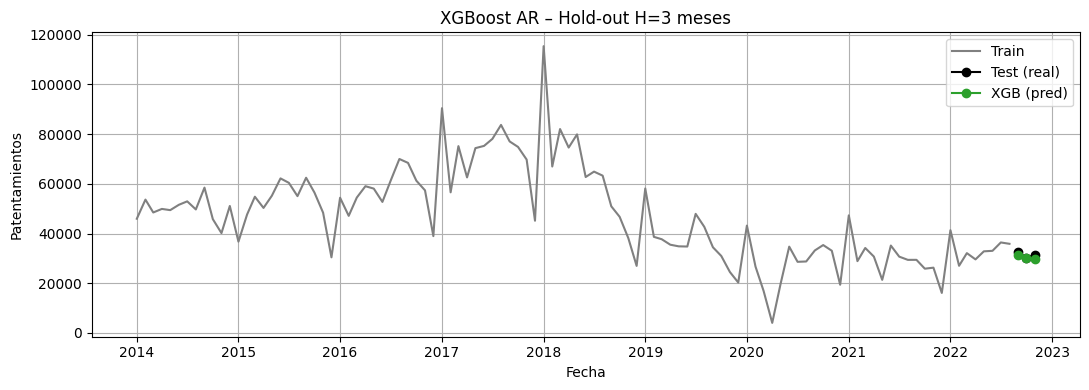

In [30]:
# ==========================================
# XGBoost Autoregresivo (AR XGB) – H=3
# Usa y_full (índice MS). Exógenas opcionales.
# ==========================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, warnings
warnings.filterwarnings("ignore")

assert 'y_full' in globals(), "Falta y_full (serie mensual con índice 'MS')."
y = y_full.astype(float).copy()
S = 12  # estacionalidad mensual

# ===== Config exógenas (opcional) =====
USE_EXOG = False                    # cambia a True si querés probar con X_all
EXOG_COLS = ['ipc_yoy_l1','ipc_mom_l1']  # columnas a usar si USE_EXOG=True

try:
    from xgboost import XGBRegressor
except Exception:
    # (Colab) instala si falta
    !pip -q install xgboost
    from xgboost import XGBRegressor

# ---------- Helpers ----------
def seasonal_naive(y_true: pd.Series):
    return y_true.shift(S)

def metrics(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    rmse = float(np.sqrt(np.mean((y_true - y_pred)**2)))
    mae  = float(np.mean(np.abs(y_true - y_pred)))
    mask = y_true != 0
    mape = float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100) if mask.any() else np.nan
    return rmse, mae, mape

def make_train_matrix(series: pd.Series, max_lag=12):
    df = pd.DataFrame(index=series.index)
    for k in [1,2,3,12]:
        df[f'lag{k}'] = series.shift(k)
    df['ma3'] = series.shift(1).rolling(3).mean()
    df['ma6'] = series.shift(1).rolling(6).mean()
    df['month'] = series.index.month.astype(int)
    df['month_sin'] = np.sin(2*np.pi*df['month']/12)
    df['month_cos'] = np.cos(2*np.pi*df['month']/12)
    df['y'] = series.values
    df = df.dropna()
    return df.drop(columns=['y']), df['y']

def make_one_row_features(history: pd.Series, next_ts: pd.Timestamp):
    row = {}
    row['lag1']  = history.iloc[-1]
    row['lag2']  = history.iloc[-2] if len(history)>=2 else history.iloc[-1]
    row['lag3']  = history.iloc[-3] if len(history)>=3 else history.iloc[-1]
    row['lag12'] = history.iloc[-12] if len(history)>=12 else history.iloc[-1]
    row['ma3'] = history.iloc[-3:].mean() if len(history)>=3 else history.mean()
    row['ma6'] = history.iloc[-6:].mean() if len(history)>=6 else history.mean()
    m = next_ts.month
    row['month'] = m
    row['month_sin'] = np.sin(2*np.pi*m/12)
    row['month_cos'] = np.cos(2*np.pi*m/12)
    return pd.DataFrame([row], index=[next_ts])

def xgb_model():
    return XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror'
    )

def add_exog_train(X_tr: pd.DataFrame, X_all: pd.DataFrame):
    use_cols = [c for c in EXOG_COLS if c in X_all.columns]
    if not use_cols:
        return X_tr, []
    Z = X_all[use_cols].reindex(X_tr.index)
    return pd.concat([X_tr, Z], axis=1), use_cols

def add_exog_row(next_ts: pd.Timestamp, X_all: pd.DataFrame, use_cols: list):
    if not use_cols:
        return None
    z = X_all.loc[[next_ts], use_cols]
    return z if not z.isnull().any().any() else None

def recursive_forecast_xgb(y_series: pd.Series, H: int, use_exog=False, X_all=None):
    cutoff = y_series.index.max() - pd.DateOffset(months=H)
    y_tr = y_series.loc[:cutoff]
    y_te = y_series.loc[cutoff+pd.DateOffset(months=1):]

    X_tr0, y_tr0 = make_train_matrix(y_tr, max_lag=12)
    if USE_EXOG and use_exog and X_all is not None:
        X_tr, used_cols = add_exog_train(X_tr0, X_all)
    else:
        X_tr, used_cols = X_tr0, []

    model = xgb_model()
    model.fit(X_tr, y_tr0, verbose=False)

    history = y_tr.copy()
    preds = []
    next_dates = pd.date_range(history.index.max() + pd.offsets.MonthBegin(), periods=H, freq='MS')

    for ts in next_dates:
        x_row = make_one_row_features(history, ts)
        if used_cols:
            z_row = add_exog_row(ts, X_all, used_cols)
            xr = pd.concat([x_row, z_row], axis=1) if z_row is not None else x_row
        else:
            xr = x_row
        yhat = float(model.predict(xr)[0])
        preds.append(yhat)
        history.loc[ts] = yhat

    yhat = pd.Series(preds, index=next_dates, name='yhat')
    rmse, mae, mape = metrics(y_te.values, yhat.values)
    return {'cutoff': cutoff, 'H': H, 'rmse': rmse, 'mae': mae, 'mape': mape,
            'y_te': y_te, 'yhat': yhat, 'model': model}

# ===== Ejecutar H=3 =====
# (si usás exógenas, asegurate de tener X_all con índice MS y EXOG_COLS disponibles)
if USE_EXOG:
    assert 'X_all' in globals(), "USE_EXOG=True pero falta X_all."
    common_idx = y.index.intersection(X_all.index)
    y = y.loc[common_idx]
    X_all = X_all.loc[common_idx]
else:
    X_all = None

print(f"[INFO] Serie para XGB (H=3): {y.index.min().date()} → {y.index.max().date()} | n={len(y)} | exog={USE_EXOG}")
res3  = recursive_forecast_xgb(y, H=3, use_exog=USE_EXOG, X_all=X_all)

# Baseline naive estacional en el mismo rango
def eval_naive(y, H):
    cutoff = y.index.max() - pd.DateOffset(months=H)
    y_te = y.loc[cutoff+pd.DateOffset(months=1):]
    yhat_nv = seasonal_naive(y).loc[y_te.index]
    df = pd.concat([y_te.rename('y'), yhat_nv.rename('yhat')], axis=1).dropna()
    r,m,a = metrics(df['y'].values, df['yhat'].values)
    return r,m,a

nv3 = eval_naive(y, 3)

print("\n=== XGB HOLD-OUT H=3 ===")
print(f"RMSE={res3['rmse']:,.1f} | MAE={res3['mae']:,.1f} | MAPE={res3['mape']:.2f}%")

print("\n=== Naive estacional (H=3) ===")
print(f"RMSE={nv3[0]:,.1f} | MAE={nv3[1]:,.1f} | MAPE={nv3[2]:.2f}%")

# Plot
plt.figure(figsize=(11,4))
hist = y.loc[:res3['cutoff']]
plt.plot(hist.index, hist.values, label='Train', color='gray')
plt.plot(res3['y_te'].index, res3['y_te'].values, label='Test (real)', color='black', marker='o')
plt.plot(res3['yhat'].index, res3['yhat'].values, label='XGB (pred)', color='tab:green', marker='o')
plt.title("XGBoost AR – Hold-out H=3 meses")
plt.xlabel("Fecha"); plt.ylabel("Patentamientos"); plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


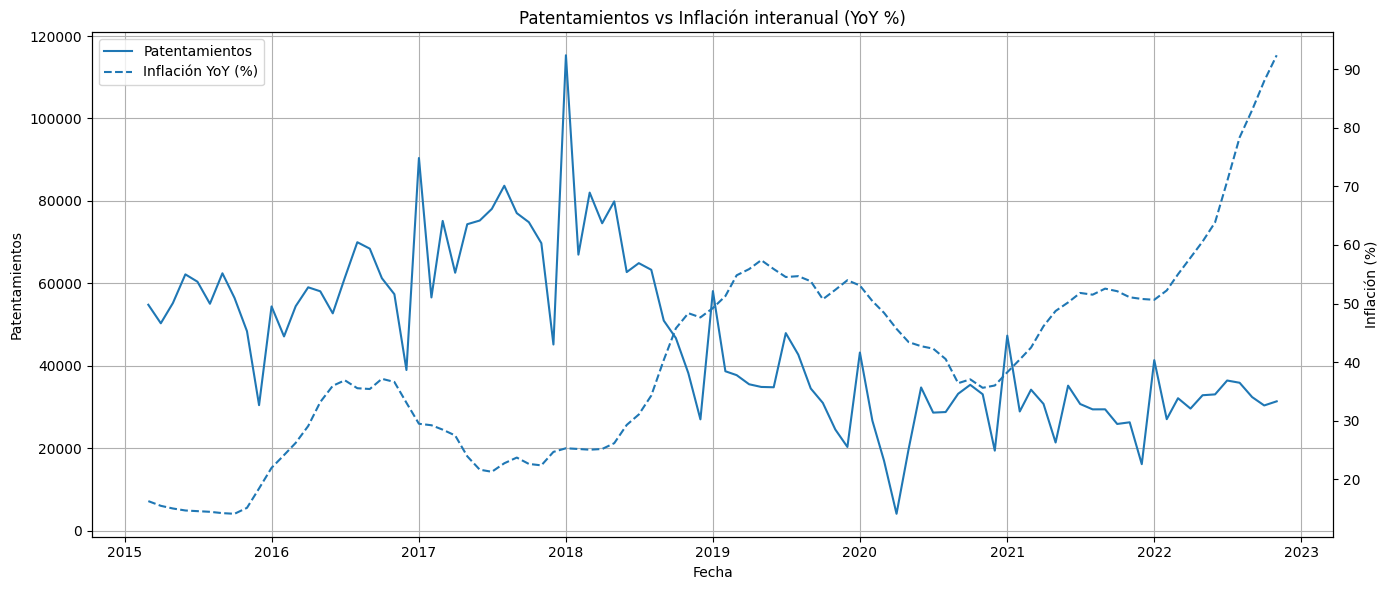

In [31]:
# === Patentamientos vs Inflación (misma temporalidad) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Elegí qué inflación graficar: 'yoy' (interanual %) o 'mom' (mensual %)
USE = 'yoy'  # 'yoy' o 'mom'

# --- 2) Tomamos la serie de patentamientos (y_full) a frecuencia MS
assert 'y_full' in globals(), "Falta y_full (serie mensual con índice 'MS')."
pat = y_full.asfreq('MS').astype(float)

# --- 3) Intentamos obtener la serie de IPC de lo que ya tenés en memoria
ipc = None

# Opción A: ya creaste ipc_feat (del paso de IPC)
if ('ipc_feat' in globals()) and isinstance(ipc_feat, pd.DataFrame):
    if USE == 'yoy' and 'ipc_yoy' in ipc_feat.columns:
        ipc = ipc_feat['ipc_yoy'].astype(float)
    elif USE == 'mom' and 'ipc_mom' in ipc_feat.columns:
        ipc = ipc_feat['ipc_mom'].astype(float)

# Opción B: tomar desde X_all si existiera ahí
if ipc is None and ('X_all' in globals()) and isinstance(X_all, pd.DataFrame):
    if USE == 'yoy' and 'ipc_yoy' in X_all.columns:
        ipc = X_all['ipc_yoy'].astype(float)
    elif USE == 'mom' and 'ipc_mom' in X_all.columns:
        ipc = X_all['ipc_mom'].astype(float)

# Opción C (opcional): reconstruir rápido desde df_ipc crudo "Fecha" + "IPC (%)"
# Descomentar si necesitás reconstruir desde el CSV ya cargado en df_ipc (ajustá nombres si difieren)
# if ipc is None and 'df_ipc' in globals():
#     tmp = df_ipc.copy()
#     tmp['Fecha'] = pd.to_datetime(tmp['Fecha'], errors='coerce', dayfirst=True)
#     v = (tmp['IPC (%)'].astype(str).str.replace('%','', regex=False)
#                          .str.replace(',','.', regex=False).str.strip())
#     mom = pd.to_numeric(v, errors='coerce')
#     mom = (mom.groupby(tmp['Fecha'].dt.to_period('M')).last()
#               .to_timestamp(how='start').asfreq('MS'))
#     if USE == 'mom':
#         ipc = mom
#     else:
#         yoy = ((1 + mom/100).rolling(12, min_periods=12).apply(np.prod, raw=True) - 1) * 100
#         ipc = yoy

assert ipc is not None, "No encontré IPC en ipc_feat/X_all. Si lo necesitás, descomentá la Opción C para reconstruirlo."

# --- 4) Alinear temporalidad y graficar
ipc = ipc.asfreq('MS')
idx = pat.index.intersection(ipc.dropna().index)
pat_al = pat.loc[idx]
ipc_al = ipc.loc[idx]

fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(pat_al.index, pat_al.values, label='Patentamientos', linewidth=1.5)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Patentamientos')

ax2 = ax1.twinx()
ax2.plot(ipc_al.index, ipc_al.values, linestyle='--', linewidth=1.5,
         label=('Inflación YoY (%)' if USE=='yoy' else 'Inflación MoM (%)'))
ax2.set_ylabel('Inflación (%)')

title_ipc = 'interanual (YoY %)' if USE=='yoy' else 'mensual (MoM %)'
plt.title(f'Patentamientos vs Inflación {title_ipc}')

# Leyenda combinada
l1, lab1 = ax1.get_legend_handles_labels()
l2, lab2 = ax2.get_legend_handles_labels()
ax1.legend(l1+l2, lab1+lab2, loc='upper left')

ax1.grid(True)
plt.tight_layout()
plt.show()
